# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

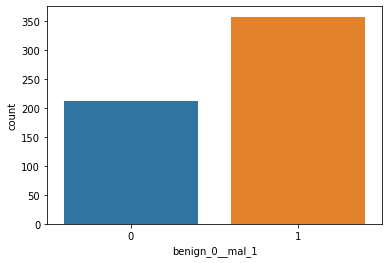

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

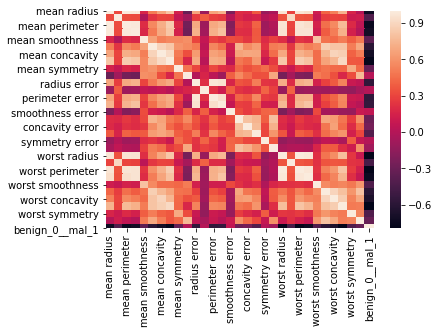

In [7]:
sns.heatmap(df.corr())

In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

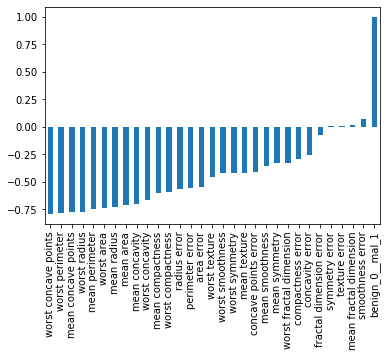

In [9]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

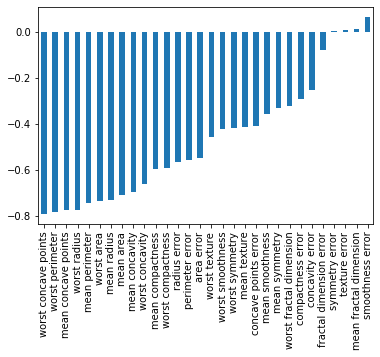

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [11]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [68]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [19]:
X_train.shape

(426, 30)

In [20]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [21]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6913 - val_loss: 0.6717
Epoch 2/600
426/426 [==============================] - 0s 127us/sample - loss: 0.6584 - val_loss: 0.6416
Epoch 3/600
426/426 [==============================] - 0s 106us/sample - loss: 0.6305 - val_loss: 0.6126
Epoch 4/600
426/426 [==============================] - 0s 127us/sample - loss: 0.6010 - val_loss: 0.5793
Epoch 5/600
426/426 [==============================] - 0s 124us/sample - loss: 0.5666 - val_loss: 0.5393
Epoch 6/600
426/426 [==============================] - 0s 101us/sample - loss: 0.5205 - val_loss: 0.4858
Epoch 7/600
426/426 [==============================] - 0s 150us/sample - loss: 0.4711 - val_loss: 0.4373
Epoch 8/600
426/426 [==============================] - 0s 120us/sample - loss: 0.4242 - val_loss: 0.3891
Epoch 9/600
426/426 [==============================] - 0s 127us/sample - loss: 0.3793 - val_loss: 0.3449
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0548 - val_loss: 0.1086
Epoch 79/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0559 - val_loss: 0.1124
Epoch 80/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0545 - val_loss: 0.1107
Epoch 81/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0544 - val_loss: 0.1173
Epoch 82/600
426/426 [==============================] - 0s 162us/sample - loss: 0.0543 - val_loss: 0.1131
Epoch 83/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0540 - val_loss: 0.1156
Epoch 84/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0531 - val_loss: 0.1152
Epoch 85/600
426/426 [==============================] - 0s 185us/sample - loss: 0.0543 - val_loss: 0.1104
Epoch 86/600
426/426 [==============================] - 0s 147us/sample - loss: 0.0567 - val_loss: 0.1158
Epoch 87/600
426/426 [========================

426/426 [==============================] - 0s 113us/sample - loss: 0.0420 - val_loss: 0.1202
Epoch 155/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0418 - val_loss: 0.1232
Epoch 156/600
426/426 [==============================] - 0s 111us/sample - loss: 0.0421 - val_loss: 0.1202
Epoch 157/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0492 - val_loss: 0.1282
Epoch 158/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0432 - val_loss: 0.1205
Epoch 159/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0402 - val_loss: 0.1259
Epoch 160/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0415 - val_loss: 0.1230
Epoch 161/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0396 - val_loss: 0.1257
Epoch 162/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0404 - val_loss: 0.1227
Epoch 163/600
426/426 [==============================] -

426/426 [==============================] - 0s 171us/sample - loss: 0.0414 - val_loss: 0.1363
Epoch 231/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0331 - val_loss: 0.1204
Epoch 232/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0312 - val_loss: 0.1258
Epoch 233/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0325 - val_loss: 0.1191
Epoch 234/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0317 - val_loss: 0.1294
Epoch 235/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0334 - val_loss: 0.1288
Epoch 236/600
426/426 [==============================] - 0s 148us/sample - loss: 0.0337 - val_loss: 0.1230
Epoch 237/600
426/426 [==============================] - 0s 134us/sample - loss: 0.0308 - val_loss: 0.1337
Epoch 238/600
426/426 [==============================] - 0s 204us/sample - loss: 0.0312 - val_loss: 0.1228
Epoch 239/600
426/426 [============================

426/426 [==============================] - 0s 172us/sample - loss: 0.0247 - val_loss: 0.1234
Epoch 307/600
426/426 [==============================] - 0s 190us/sample - loss: 0.0317 - val_loss: 0.1441
Epoch 308/600
426/426 [==============================] - 0s 177us/sample - loss: 0.0260 - val_loss: 0.1287
Epoch 309/600
426/426 [==============================] - 0s 156us/sample - loss: 0.0255 - val_loss: 0.1511
Epoch 310/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0263 - val_loss: 0.1347
Epoch 311/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0253 - val_loss: 0.1372
Epoch 312/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0251 - val_loss: 0.1205
Epoch 313/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0243 - val_loss: 0.1422
Epoch 314/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0246 - val_loss: 0.1375
Epoch 315/600
426/426 [============================

426/426 [==============================] - 0s 141us/sample - loss: 0.0213 - val_loss: 0.1345
Epoch 383/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0197 - val_loss: 0.1450
Epoch 384/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0227 - val_loss: 0.1314
Epoch 385/600
426/426 [==============================] - 0s 130us/sample - loss: 0.0198 - val_loss: 0.1360
Epoch 386/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0196 - val_loss: 0.1431
Epoch 387/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0188 - val_loss: 0.1320
Epoch 388/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0197 - val_loss: 0.1469
Epoch 389/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0201 - val_loss: 0.1402
Epoch 390/600
426/426 [==============================] - 0s 140us/sample - loss: 0.0187 - val_loss: 0.1490
Epoch 391/600
426/426 [============================

Epoch 459/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0153 - val_loss: 0.1430
Epoch 460/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0164 - val_loss: 0.1645
Epoch 461/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0162 - val_loss: 0.1406
Epoch 462/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0159 - val_loss: 0.1483
Epoch 463/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0153 - val_loss: 0.1531
Epoch 464/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0157 - val_loss: 0.1504
Epoch 465/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0173 - val_loss: 0.1509
Epoch 466/600
426/426 [==============================] - 0s 92us/sample - loss: 0.0199 - val_loss: 0.1373
Epoch 467/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0209 - val_loss: 0.1861
Epoch 468/600
426/426 [==================

Epoch 536/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0117 - val_loss: 0.1676
Epoch 537/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0150 - val_loss: 0.1606
Epoch 538/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0153 - val_loss: 0.1486
Epoch 539/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0126 - val_loss: 0.1585
Epoch 540/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0136 - val_loss: 0.1487
Epoch 541/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0130 - val_loss: 0.1815
Epoch 542/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0120 - val_loss: 0.1611
Epoch 543/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0124 - val_loss: 0.1577
Epoch 544/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0137 - val_loss: 0.1918
Epoch 545/600
426/426 [=====================

In [22]:
# model.history.history

In [23]:
model_loss = pd.DataFrame(model.history.history)

In [24]:
# model_loss

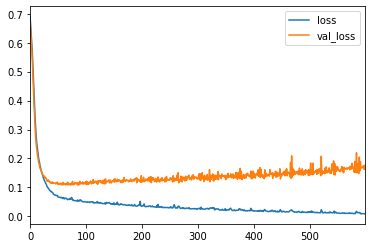

In [25]:
model_loss.plot()

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [26]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [28]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [29]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6732 - val_loss: 0.6602
Epoch 2/600
426/426 [==============================] - 0s 131us/sample - loss: 0.6383 - val_loss: 0.6268
Epoch 3/600
426/426 [==============================] - 0s 103us/sample - loss: 0.6049 - val_loss: 0.5928
Epoch 4/600
426/426 [==============================] - 0s 148us/sample - loss: 0.5659 - val_loss: 0.5484
Epoch 5/600
426/426 [==============================] - 0s 96us/sample - loss: 0.5161 - val_loss: 0.4959
Epoch 6/600
426/426 [==============================] - 0s 120us/sample - loss: 0.4633 - val_loss: 0.4395
Epoch 7/600
426/426 [==============================] - 0s 124us/sample - loss: 0.4096 - val_loss: 0.3859
Epoch 8/600
426/426 [==============================] - 0s 127us/sample - loss: 0.3629 - val_loss: 0.3381
Epoch 9/600
426/426 [==============================] - 0s 101us/sample - loss: 0.3196 - val_loss: 0.2996
Epoch 10/600

Epoch 78/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0510 - val_loss: 0.1165
Epoch 79/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0517 - val_loss: 0.1188
Epoch 80/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0509 - val_loss: 0.1149
Epoch 00080: early stopping


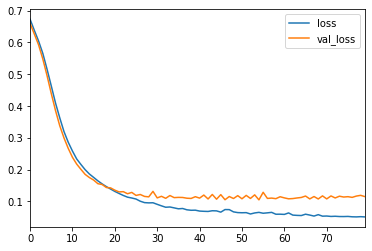

In [30]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [31]:
from tensorflow.keras.layers import Dropout

In [32]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [33]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.7189 - val_loss: 0.6952
Epoch 2/600
426/426 [==============================] - 0s 129us/sample - loss: 0.6979 - val_loss: 0.6766
Epoch 3/600
426/426 [==============================] - 0s 120us/sample - loss: 0.6962 - val_loss: 0.6649
Epoch 4/600
426/426 [==============================] - 0s 129us/sample - loss: 0.6588 - val_loss: 0.6487
Epoch 5/600
426/426 [==============================] - 0s 124us/sample - loss: 0.6312 - val_loss: 0.6302
Epoch 6/600
426/426 [==============================] - 0s 122us/sample - loss: 0.6301 - val_loss: 0.6140
Epoch 7/600
426/426 [==============================] - 0s 110us/sample - loss: 0.6036 - val_loss: 0.5927
Epoch 8/600
426/426 [==============================] - 0s 141us/sample - loss: 0.5987 - val_loss: 0.5682
Epoch 9/600
426/426 [==============================] - 0s 108us/sample - loss: 0.5752 - val_loss: 0.5400
Epoch 10/60

426/426 [==============================] - 0s 129us/sample - loss: 0.0998 - val_loss: 0.0967
Epoch 79/600
426/426 [==============================] - 0s 103us/sample - loss: 0.1272 - val_loss: 0.0958
Epoch 80/600
426/426 [==============================] - 0s 94us/sample - loss: 0.1186 - val_loss: 0.0943
Epoch 81/600
426/426 [==============================] - 0s 96us/sample - loss: 0.1184 - val_loss: 0.1047
Epoch 82/600
426/426 [==============================] - 0s 115us/sample - loss: 0.1278 - val_loss: 0.0976
Epoch 83/600
426/426 [==============================] - 0s 106us/sample - loss: 0.1439 - val_loss: 0.0970
Epoch 84/600
426/426 [==============================] - ETA: 0s - loss: 0.104 - 0s 96us/sample - loss: 0.1246 - val_loss: 0.0942
Epoch 85/600
426/426 [==============================] - 0s 96us/sample - loss: 0.1303 - val_loss: 0.0946
Epoch 86/600
426/426 [==============================] - 0s 123us/sample - loss: 0.1067 - val_loss: 0.1046
Epoch 87/600
426/426 [=================

Epoch 155/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0795 - val_loss: 0.0915
Epoch 156/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0609 - val_loss: 0.0857
Epoch 157/600
426/426 [==============================] - 0s 171us/sample - loss: 0.0731 - val_loss: 0.1046
Epoch 158/600
426/426 [==============================] - 0s 201us/sample - loss: 0.0937 - val_loss: 0.1012
Epoch 159/600
426/426 [==============================] - 0s 192us/sample - loss: 0.0821 - val_loss: 0.0864
Epoch 160/600
426/426 [==============================] - 0s 134us/sample - loss: 0.0705 - val_loss: 0.0890
Epoch 161/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0854 - val_loss: 0.0919
Epoch 162/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0748 - val_loss: 0.1028
Epoch 163/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0888 - val_loss: 0.0881
Epoch 164/600
426/426 [==============

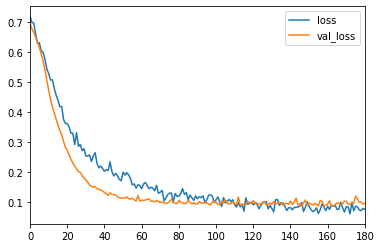

In [34]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [35]:
predictions = model.predict_classes(X_test)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score

In [37]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [38]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

In [97]:
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.05, min_lr=0.00001, verbose = 1, patience=5)
es = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience=50)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose = 1, save_best_only=True)

In [103]:
def build_model(dr = 0):
    model = Sequential()
    model.add(Dense(128, input_dim=30, activation ='relu'))
    model.add(BatchNormalization())
    model.add(Dense(64, activation ='relu'))
    model.add(Dropout(dr))
    model.add(Dense(32, activation ='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dr))
    model.add(BatchNormalization())
    model.add(Dense(8, activation ='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer = 'Adam' ,loss='binary_crossentropy', metrics = ['accuracy'])
    return model

In [104]:
model = build_model(dr = 0.4)
model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
          batch_size=32, epochs=500,
          callbacks=[rlr, es, mc])

Train on 426 samples, validate on 143 samples
Epoch 1/500
 32/426 [=>............................] - ETA: 15s - loss: 0.7320 - accuracy: 0.5312
Epoch 00001: val_loss did not improve from 0.04844
426/426 [==============================] - 1s 3ms/sample - loss: 0.5891 - accuracy: 0.7089 - val_loss: 0.6785 - val_accuracy: 0.7063
Epoch 2/500
416/426 [============================>.] - ETA: 0s - loss: 0.4322 - accuracy: 0.8606
Epoch 00002: val_loss did not improve from 0.04844
426/426 [==============================] - 0s 239us/sample - loss: 0.4339 - accuracy: 0.8568 - val_loss: 0.6475 - val_accuracy: 0.8881
Epoch 3/500
 32/426 [=>............................] - ETA: 0s - loss: 0.3810 - accuracy: 0.8750
Epoch 00003: val_loss did not improve from 0.04844
426/426 [==============================] - 0s 171us/sample - loss: 0.3388 - accuracy: 0.9225 - val_loss: 0.6119 - val_accuracy: 0.9091
Epoch 4/500
 32/426 [=>............................] - ETA: 0s - loss: 0.2623 - accuracy: 0.9688
Epoch 000

Epoch 30/500
 32/426 [=>............................] - ETA: 0s - loss: 0.2269 - accuracy: 0.9062
Epoch 00030: val_loss did not improve from 0.04844
426/426 [==============================] - 0s 164us/sample - loss: 0.1088 - accuracy: 0.9531 - val_loss: 0.0882 - val_accuracy: 0.9720
Epoch 31/500
 32/426 [=>............................] - ETA: 0s - loss: 0.1408 - accuracy: 0.9375
Epoch 00031: val_loss did not improve from 0.04844
426/426 [==============================] - 0s 155us/sample - loss: 0.1137 - accuracy: 0.9531 - val_loss: 0.0835 - val_accuracy: 0.9720
Epoch 32/500
 32/426 [=>............................] - ETA: 0s - loss: 0.0471 - accuracy: 1.0000
Epoch 00032: val_loss did not improve from 0.04844
426/426 [==============================] - 0s 160us/sample - loss: 0.0959 - accuracy: 0.9624 - val_loss: 0.0788 - val_accuracy: 0.9720
Epoch 33/500
 32/426 [=>............................] - ETA: 0s - loss: 0.0341 - accuracy: 1.0000
Epoch 00033: val_loss did not improve from 0.04844

 32/426 [=>............................] - ETA: 0s - loss: 0.1074 - accuracy: 0.9688
Epoch 00058: val_loss improved from 0.04567 to 0.04542, saving model to best_model.h5
426/426 [==============================] - 0s 284us/sample - loss: 0.1107 - accuracy: 0.9648 - val_loss: 0.0454 - val_accuracy: 0.9860
Epoch 59/500
 32/426 [=>............................] - ETA: 0s - loss: 0.0583 - accuracy: 0.9688
Epoch 00059: val_loss improved from 0.04542 to 0.04515, saving model to best_model.h5
426/426 [==============================] - 0s 249us/sample - loss: 0.0676 - accuracy: 0.9742 - val_loss: 0.0452 - val_accuracy: 0.9860
Epoch 60/500
 32/426 [=>............................] - ETA: 0s - loss: 0.0384 - accuracy: 1.0000
Epoch 00060: val_loss improved from 0.04515 to 0.04480, saving model to best_model.h5
426/426 [==============================] - 0s 260us/sample - loss: 0.0725 - accuracy: 0.9765 - val_loss: 0.0448 - val_accuracy: 0.9860
Epoch 61/500
 32/426 [=>............................] - 

 32/426 [=>............................] - ETA: 0s - loss: 0.0311 - accuracy: 1.0000
Epoch 00085: val_loss did not improve from 0.04200
426/426 [==============================] - 0s 131us/sample - loss: 0.0619 - accuracy: 0.9836 - val_loss: 0.0426 - val_accuracy: 0.9860
Epoch 86/500
 32/426 [=>............................] - ETA: 0s - loss: 0.1241 - accuracy: 0.9688
Epoch 00086: val_loss did not improve from 0.04200
426/426 [==============================] - 0s 141us/sample - loss: 0.0845 - accuracy: 0.9695 - val_loss: 0.0425 - val_accuracy: 0.9860
Epoch 87/500
 32/426 [=>............................] - ETA: 0s - loss: 0.0242 - accuracy: 1.0000
Epoch 00087: val_loss did not improve from 0.04200
426/426 [==============================] - 0s 145us/sample - loss: 0.1000 - accuracy: 0.9695 - val_loss: 0.0423 - val_accuracy: 0.9860
Epoch 88/500
 32/426 [=>............................] - ETA: 0s - loss: 0.0293 - accuracy: 1.0000
Epoch 00088: val_loss did not improve from 0.04200
426/426 [===

Epoch 114/500
 32/426 [=>............................] - ETA: 0s - loss: 0.0169 - accuracy: 1.0000
Epoch 00114: val_loss did not improve from 0.04134
426/426 [==============================] - 0s 152us/sample - loss: 0.0705 - accuracy: 0.9695 - val_loss: 0.0415 - val_accuracy: 0.9860
Epoch 115/500
 32/426 [=>............................] - ETA: 0s - loss: 0.2107 - accuracy: 0.8750
Epoch 00115: val_loss improved from 0.04134 to 0.04129, saving model to best_model.h5
426/426 [==============================] - 0s 230us/sample - loss: 0.0916 - accuracy: 0.9601 - val_loss: 0.0413 - val_accuracy: 0.9860
Epoch 116/500
 32/426 [=>............................] - ETA: 0s - loss: 0.1052 - accuracy: 0.9375
Epoch 00116: val_loss improved from 0.04129 to 0.04115, saving model to best_model.h5
426/426 [==============================] - 0s 230us/sample - loss: 0.0629 - accuracy: 0.9812 - val_loss: 0.0411 - val_accuracy: 0.9860
Epoch 117/500
 32/426 [=>............................] - ETA: 0s - loss: 0.

Epoch 00142: val_loss did not improve from 0.04104
426/426 [==============================] - 0s 136us/sample - loss: 0.0628 - accuracy: 0.9812 - val_loss: 0.0419 - val_accuracy: 0.9860
Epoch 143/500
384/426 [==========================>...] - ETA: 0s - loss: 0.0696 - accuracy: 0.9792
Epoch 00143: val_loss did not improve from 0.04104
426/426 [==============================] - 0s 216us/sample - loss: 0.0769 - accuracy: 0.9742 - val_loss: 0.0418 - val_accuracy: 0.9860
Epoch 144/500
 32/426 [=>............................] - ETA: 0s - loss: 0.0177 - accuracy: 1.0000
Epoch 00144: val_loss did not improve from 0.04104
426/426 [==============================] - 0s 160us/sample - loss: 0.0853 - accuracy: 0.9695 - val_loss: 0.0418 - val_accuracy: 0.9860
Epoch 145/500
 32/426 [=>............................] - ETA: 0s - loss: 0.0220 - accuracy: 1.0000
Epoch 00145: val_loss did not improve from 0.04104
426/426 [==============================] - 0s 190us/sample - loss: 0.0751 - accuracy: 0.9742 -

Epoch 171/500
 32/426 [=>............................] - ETA: 0s - loss: 0.0731 - accuracy: 0.9688
Epoch 00171: val_loss did not improve from 0.04099
426/426 [==============================] - 0s 148us/sample - loss: 0.0636 - accuracy: 0.9765 - val_loss: 0.0413 - val_accuracy: 0.9860
Epoch 172/500
 32/426 [=>............................] - ETA: 0s - loss: 0.1134 - accuracy: 0.9375
Epoch 00172: val_loss did not improve from 0.04099
426/426 [==============================] - 0s 143us/sample - loss: 0.0740 - accuracy: 0.9836 - val_loss: 0.0412 - val_accuracy: 0.9860
Epoch 173/500
 32/426 [=>............................] - ETA: 0s - loss: 0.0208 - accuracy: 1.0000
Epoch 00173: val_loss did not improve from 0.04099
426/426 [==============================] - 0s 136us/sample - loss: 0.1154 - accuracy: 0.9671 - val_loss: 0.0410 - val_accuracy: 0.9860
Epoch 174/500
 32/426 [=>............................] - ETA: 0s - loss: 0.1016 - accuracy: 0.9375
Epoch 00174: val_loss did not improve from 0.0

 32/426 [=>............................] - ETA: 0s - loss: 0.0411 - accuracy: 1.0000
Epoch 00199: val_loss did not improve from 0.04066
426/426 [==============================] - 0s 178us/sample - loss: 0.0753 - accuracy: 0.9812 - val_loss: 0.0409 - val_accuracy: 0.9930
Epoch 200/500
 32/426 [=>............................] - ETA: 0s - loss: 0.0501 - accuracy: 1.0000
Epoch 00200: val_loss did not improve from 0.04066
426/426 [==============================] - 0s 195us/sample - loss: 0.0591 - accuracy: 0.9812 - val_loss: 0.0408 - val_accuracy: 0.9930
Epoch 201/500
 32/426 [=>............................] - ETA: 0s - loss: 0.0211 - accuracy: 1.0000
Epoch 00201: val_loss did not improve from 0.04066
426/426 [==============================] - 0s 171us/sample - loss: 0.0699 - accuracy: 0.9742 - val_loss: 0.0408 - val_accuracy: 0.9930
Epoch 202/500
 32/426 [=>............................] - ETA: 0s - loss: 0.0291 - accuracy: 1.0000
Epoch 00202: val_loss improved from 0.04066 to 0.04062, savi

Epoch 00227: val_loss did not improve from 0.04028
426/426 [==============================] - 0s 150us/sample - loss: 0.0926 - accuracy: 0.9624 - val_loss: 0.0404 - val_accuracy: 0.9930
Epoch 228/500
 32/426 [=>............................] - ETA: 0s - loss: 0.1055 - accuracy: 0.9688
Epoch 00228: val_loss did not improve from 0.04028
426/426 [==============================] - 0s 160us/sample - loss: 0.0731 - accuracy: 0.9765 - val_loss: 0.0407 - val_accuracy: 0.9860
Epoch 229/500
 32/426 [=>............................] - ETA: 0s - loss: 0.0301 - accuracy: 1.0000
Epoch 00229: val_loss did not improve from 0.04028
426/426 [==============================] - 0s 143us/sample - loss: 0.0562 - accuracy: 0.9836 - val_loss: 0.0409 - val_accuracy: 0.9860
Epoch 230/500
 32/426 [=>............................] - ETA: 0s - loss: 0.0335 - accuracy: 1.0000
Epoch 00230: val_loss did not improve from 0.04028
426/426 [==============================] - 0s 167us/sample - loss: 0.0541 - accuracy: 0.9859 -

Epoch 256/500
352/426 [=======================>......] - ETA: 0s - loss: 0.0565 - accuracy: 0.9830
Epoch 00256: val_loss did not improve from 0.04004
426/426 [==============================] - 0s 270us/sample - loss: 0.0892 - accuracy: 0.9742 - val_loss: 0.0403 - val_accuracy: 0.9860
Epoch 257/500
352/426 [=======================>......] - ETA: 0s - loss: 0.0788 - accuracy: 0.9716
Epoch 00257: val_loss did not improve from 0.04004
426/426 [==============================] - 0s 263us/sample - loss: 0.0725 - accuracy: 0.9765 - val_loss: 0.0403 - val_accuracy: 0.9860
Epoch 258/500
288/426 [===================>..........] - ETA: 0s - loss: 0.0559 - accuracy: 0.9861
Epoch 00258: val_loss did not improve from 0.04004
426/426 [==============================] - 0s 338us/sample - loss: 0.0592 - accuracy: 0.9812 - val_loss: 0.0405 - val_accuracy: 0.9860
Epoch 259/500
 32/426 [=>............................] - ETA: 0s - loss: 0.0545 - accuracy: 0.9688
Epoch 00259: val_loss did not improve from 0.0

Epoch 285/500
 32/426 [=>............................] - ETA: 0s - loss: 0.1653 - accuracy: 0.9375
Epoch 00285: val_loss did not improve from 0.04004
426/426 [==============================] - 0s 157us/sample - loss: 0.0904 - accuracy: 0.9671 - val_loss: 0.0401 - val_accuracy: 0.9930
Epoch 286/500
 32/426 [=>............................] - ETA: 0s - loss: 0.0569 - accuracy: 0.9688
Epoch 00286: val_loss improved from 0.04004 to 0.03983, saving model to best_model.h5
426/426 [==============================] - 0s 258us/sample - loss: 0.0696 - accuracy: 0.9718 - val_loss: 0.0398 - val_accuracy: 0.9930
Epoch 287/500
 32/426 [=>............................] - ETA: 0s - loss: 0.1351 - accuracy: 0.9375
Epoch 00287: val_loss improved from 0.03983 to 0.03973, saving model to best_model.h5
426/426 [==============================] - 0s 272us/sample - loss: 0.1290 - accuracy: 0.9460 - val_loss: 0.0397 - val_accuracy: 0.9930
Epoch 288/500
 32/426 [=>............................] - ETA: 0s - loss: 0.

Epoch 313/500
 32/426 [=>............................] - ETA: 0s - loss: 0.1380 - accuracy: 0.9375
Epoch 00313: val_loss did not improve from 0.03953
426/426 [==============================] - 0s 181us/sample - loss: 0.0820 - accuracy: 0.9695 - val_loss: 0.0400 - val_accuracy: 0.9860
Epoch 314/500
 32/426 [=>............................] - ETA: 0s - loss: 0.0588 - accuracy: 0.9688
Epoch 00314: val_loss did not improve from 0.03953
426/426 [==============================] - 0s 152us/sample - loss: 0.0681 - accuracy: 0.9812 - val_loss: 0.0399 - val_accuracy: 0.9860
Epoch 315/500
 32/426 [=>............................] - ETA: 0s - loss: 0.0206 - accuracy: 1.0000
Epoch 00315: val_loss did not improve from 0.03953
426/426 [==============================] - 0s 148us/sample - loss: 0.1024 - accuracy: 0.9624 - val_loss: 0.0398 - val_accuracy: 0.9930
Epoch 316/500
 32/426 [=>............................] - ETA: 0s - loss: 0.0402 - accuracy: 1.0000
Epoch 00316: val_loss did not improve from 0.0

Epoch 342/500
 32/426 [=>............................] - ETA: 0s - loss: 0.1651 - accuracy: 0.9375
Epoch 00342: val_loss did not improve from 0.03953
426/426 [==============================] - 0s 169us/sample - loss: 0.0818 - accuracy: 0.9718 - val_loss: 0.0401 - val_accuracy: 0.9860
Epoch 343/500
 32/426 [=>............................] - ETA: 0s - loss: 0.0562 - accuracy: 1.0000
Epoch 00343: val_loss did not improve from 0.03953
426/426 [==============================] - 0s 181us/sample - loss: 0.0804 - accuracy: 0.9695 - val_loss: 0.0400 - val_accuracy: 0.9860
Epoch 344/500
 32/426 [=>............................] - ETA: 0s - loss: 0.0690 - accuracy: 0.9688
Epoch 00344: val_loss did not improve from 0.03953
426/426 [==============================] - 0s 169us/sample - loss: 0.0665 - accuracy: 0.9718 - val_loss: 0.0400 - val_accuracy: 0.9860
Epoch 345/500
 32/426 [=>............................] - ETA: 0s - loss: 0.0529 - accuracy: 1.0000
Epoch 00345: val_loss did not improve from 0.0

In [105]:
predictions = model.predict_classes(X_test)

In [106]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [107]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 1 87]]


In [108]:
# run network
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1337)
pred = np.zeros((len(X_test),1))
n_fold = 0
for idx_train, idx_valid in rskf.split(X_train, y_train):
    train_x, train_y = X_train[idx_train], y_train[idx_train]
    valid_x, valid_y = X_train[idx_valid], y_train[idx_valid]
    
    model = build_model(dr = 0.4)
    model.fit(train_x, train_y, validation_data=(valid_x, valid_y), 
              batch_size = 32, epochs = 500, verbose = 1, 
              callbacks = [rlr, es, mc])
    oof_preds = model.predict(valid_x)
    pred += model.predict(X_test, batch_size = 1024, verbose = 1)/15
    
    print('Fold %1d ROC_AUC: %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds)))
    n_fold = n_fold + 1

Train on 340 samples, validate on 86 samples
Epoch 1/500
 32/340 [=>............................] - ETA: 11s - loss: 0.9669 - accuracy: 0.4062
Epoch 00001: val_loss did not improve from 0.03953
340/340 [==============================] - 1s 4ms/sample - loss: 0.6676 - accuracy: 0.6206 - val_loss: 0.6824 - val_accuracy: 0.4535
Epoch 2/500
 32/340 [=>............................] - ETA: 0s - loss: 0.5488 - accuracy: 0.6562
Epoch 00002: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 200us/sample - loss: 0.4594 - accuracy: 0.7735 - val_loss: 0.6706 - val_accuracy: 0.5116
Epoch 3/500
 32/340 [=>............................] - ETA: 0s - loss: 0.3934 - accuracy: 0.7812
Epoch 00003: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 203us/sample - loss: 0.3575 - accuracy: 0.8529 - val_loss: 0.6512 - val_accuracy: 0.5349
Epoch 4/500
 32/340 [=>............................] - ETA: 0s - loss: 0.4185 - accuracy: 0.8750
Epoch 0000

Epoch 30/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0702 - accuracy: 0.9688
Epoch 00030: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 179us/sample - loss: 0.1140 - accuracy: 0.9559 - val_loss: 0.1548 - val_accuracy: 0.9535
Epoch 31/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0176 - accuracy: 1.0000
Epoch 00031: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 156us/sample - loss: 0.0668 - accuracy: 0.9735 - val_loss: 0.1412 - val_accuracy: 0.9651
Epoch 32/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0813 - accuracy: 0.9688
Epoch 00032: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 159us/sample - loss: 0.1080 - accuracy: 0.9676 - val_loss: 0.1422 - val_accuracy: 0.9651
Epoch 33/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0769 - accuracy: 0.9688
Epoch 00033: val_loss did not improve from 0.03953

 32/340 [=>............................] - ETA: 0s - loss: 0.1013 - accuracy: 0.9688
Epoch 00058: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 194us/sample - loss: 0.0452 - accuracy: 0.9882 - val_loss: 0.1052 - val_accuracy: 0.9651
Epoch 59/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0136 - accuracy: 1.0000
Epoch 00059: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 218us/sample - loss: 0.0787 - accuracy: 0.9735 - val_loss: 0.1044 - val_accuracy: 0.9651
Epoch 60/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0602 - accuracy: 0.9688
Epoch 00060: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 229us/sample - loss: 0.0470 - accuracy: 0.9853 - val_loss: 0.1041 - val_accuracy: 0.9651
Epoch 61/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0234 - accuracy: 1.0000
Epoch 00061: val_loss did not improve from 0.03953
340/340 [===

Epoch 87/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0819 - accuracy: 0.9688
Epoch 00087: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 147us/sample - loss: 0.0608 - accuracy: 0.9794 - val_loss: 0.1046 - val_accuracy: 0.9651
Epoch 88/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0238 - accuracy: 1.0000
Epoch 00088: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 138us/sample - loss: 0.0769 - accuracy: 0.9676 - val_loss: 0.1045 - val_accuracy: 0.9651
Epoch 89/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0738 - accuracy: 0.9688
Epoch 00089: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 135us/sample - loss: 0.0573 - accuracy: 0.9824 - val_loss: 0.1048 - val_accuracy: 0.9651
Epoch 90/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0135 - accuracy: 1.0000
Epoch 00090: val_loss did not improve from 0.03953

Epoch 116/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0660 - accuracy: 0.9688
Epoch 00116: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 150us/sample - loss: 0.1047 - accuracy: 0.9559 - val_loss: 0.1005 - val_accuracy: 0.9651
Epoch 117/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0598 - accuracy: 0.9688
Epoch 00117: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 168us/sample - loss: 0.0677 - accuracy: 0.9735 - val_loss: 0.1007 - val_accuracy: 0.9651
Epoch 118/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0315 - accuracy: 1.0000
Epoch 00118: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 165us/sample - loss: 0.0751 - accuracy: 0.9765 - val_loss: 0.1004 - val_accuracy: 0.9651
Epoch 119/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0302 - accuracy: 1.0000
Epoch 00119: val_loss did not improve from 0.0

Epoch 145/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0936 - accuracy: 0.9688
Epoch 00145: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 135us/sample - loss: 0.0564 - accuracy: 0.9824 - val_loss: 0.1036 - val_accuracy: 0.9651
Epoch 146/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0752 - accuracy: 0.9688
Epoch 00146: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 141us/sample - loss: 0.0499 - accuracy: 0.9765 - val_loss: 0.1047 - val_accuracy: 0.9651
Epoch 147/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0459 - accuracy: 1.0000
Epoch 00147: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 135us/sample - loss: 0.0440 - accuracy: 0.9853 - val_loss: 0.1042 - val_accuracy: 0.9651
Epoch 148/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0312 - accuracy: 1.0000
Epoch 00148: val_loss did not improve from 0.0

Epoch 174/500
 32/340 [=>............................] - ETA: 0s - loss: 0.1613 - accuracy: 0.9688
Epoch 00174: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 165us/sample - loss: 0.0638 - accuracy: 0.9765 - val_loss: 0.1020 - val_accuracy: 0.9651
Epoch 175/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0649 - accuracy: 0.9688
Epoch 00175: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 162us/sample - loss: 0.0575 - accuracy: 0.9765 - val_loss: 0.1015 - val_accuracy: 0.9651
Epoch 176/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0421 - accuracy: 0.9688
Epoch 00176: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 179us/sample - loss: 0.0530 - accuracy: 0.9765 - val_loss: 0.1027 - val_accuracy: 0.9651
Epoch 177/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0407 - accuracy: 0.9688
Epoch 00177: val_loss did not improve from 0.0

 32/340 [=>............................] - ETA: 0s - loss: 0.2317 - accuracy: 0.9375
Epoch 00004: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 191us/sample - loss: 0.2946 - accuracy: 0.9088 - val_loss: 0.6035 - val_accuracy: 0.7442
Epoch 5/500
 32/340 [=>............................] - ETA: 0s - loss: 0.3095 - accuracy: 0.9062
Epoch 00005: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 200us/sample - loss: 0.3002 - accuracy: 0.9176 - val_loss: 0.5716 - val_accuracy: 0.8023
Epoch 6/500
288/340 [========================>.....] - ETA: 0s - loss: 0.2365 - accuracy: 0.9236
Epoch 00006: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 373us/sample - loss: 0.2246 - accuracy: 0.9324 - val_loss: 0.5360 - val_accuracy: 0.8372
Epoch 7/500
 32/340 [=>............................] - ETA: 0s - loss: 0.3211 - accuracy: 0.8750
Epoch 00007: val_loss did not improve from 0.03953
340/340 [======

Epoch 33/500
 32/340 [=>............................] - ETA: 0s - loss: 0.1232 - accuracy: 0.9375
Epoch 00033: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 218us/sample - loss: 0.0757 - accuracy: 0.9735 - val_loss: 0.1061 - val_accuracy: 0.9535
Epoch 34/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0577 - accuracy: 1.0000
Epoch 00034: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 238us/sample - loss: 0.0750 - accuracy: 0.9765 - val_loss: 0.0874 - val_accuracy: 0.9651
Epoch 35/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0381 - accuracy: 1.0000
Epoch 00035: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 179us/sample - loss: 0.0704 - accuracy: 0.9706 - val_loss: 0.0726 - val_accuracy: 0.9884
Epoch 36/500
 32/340 [=>............................] - ETA: 0s - loss: 0.1647 - accuracy: 0.9688
Epoch 00036: val_loss did not improve from 0.03953

320/340 [===========================>..] - ETA: 0s - loss: 0.1233 - accuracy: 0.9531
Epoch 00061: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 312us/sample - loss: 0.1285 - accuracy: 0.9529 - val_loss: 0.0583 - val_accuracy: 0.9767
Epoch 62/500
320/340 [===========================>..] - ETA: 0s - loss: 0.0637 - accuracy: 0.9719
Epoch 00062: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 276us/sample - loss: 0.0614 - accuracy: 0.9735 - val_loss: 0.0577 - val_accuracy: 0.9767
Epoch 63/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0360 - accuracy: 1.0000
Epoch 00063: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 206us/sample - loss: 0.0813 - accuracy: 0.9676 - val_loss: 0.0573 - val_accuracy: 0.9767
Epoch 64/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0674 - accuracy: 1.0000
Epoch 00064: val_loss did not improve from 0.03953
340/340 [===

Epoch 90/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0253 - accuracy: 1.0000
Epoch 00090: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 226us/sample - loss: 0.0760 - accuracy: 0.9676 - val_loss: 0.0547 - val_accuracy: 0.9767
Epoch 91/500
320/340 [===========================>..] - ETA: 0s - loss: 0.0708 - accuracy: 0.9719
Epoch 00091: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 253us/sample - loss: 0.0706 - accuracy: 0.9706 - val_loss: 0.0544 - val_accuracy: 0.9767
Epoch 92/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0244 - accuracy: 1.0000
Epoch 00092: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 212us/sample - loss: 0.0384 - accuracy: 0.9882 - val_loss: 0.0541 - val_accuracy: 0.9767
Epoch 93/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0758 - accuracy: 0.9688
Epoch 00093: val_loss did not improve from 0.03953

Epoch 119/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0911 - accuracy: 0.9375
Epoch 00119: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 220us/sample - loss: 0.0761 - accuracy: 0.9647 - val_loss: 0.0512 - val_accuracy: 0.9767
Epoch 120/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0422 - accuracy: 0.9688
Epoch 00120: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 259us/sample - loss: 0.0640 - accuracy: 0.9765 - val_loss: 0.0512 - val_accuracy: 0.9767
Epoch 121/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0310 - accuracy: 1.0000
Epoch 00121: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 200us/sample - loss: 0.0645 - accuracy: 0.9794 - val_loss: 0.0512 - val_accuracy: 0.9767
Epoch 122/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0166 - accuracy: 1.0000
Epoch 00122: val_loss did not improve from 0.0

Epoch 148/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0497 - accuracy: 1.0000
Epoch 00148: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 197us/sample - loss: 0.0256 - accuracy: 1.0000 - val_loss: 0.0492 - val_accuracy: 0.9767
Epoch 149/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0281 - accuracy: 1.0000
Epoch 00149: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 220us/sample - loss: 0.0499 - accuracy: 0.9853 - val_loss: 0.0491 - val_accuracy: 0.9767
Epoch 150/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0816 - accuracy: 0.9688
Epoch 00150: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 250us/sample - loss: 0.0779 - accuracy: 0.9706 - val_loss: 0.0492 - val_accuracy: 0.9767
Epoch 151/500
 32/340 [=>............................] - ETA: 0s - loss: 0.1369 - accuracy: 0.9688
Epoch 00151: val_loss did not improve from 0.0

Epoch 177/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0689 - accuracy: 0.9688
Epoch 00177: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 247us/sample - loss: 0.0663 - accuracy: 0.9735 - val_loss: 0.0462 - val_accuracy: 0.9884
Epoch 178/500
320/340 [===========================>..] - ETA: 0s - loss: 0.1080 - accuracy: 0.9563
Epoch 00178: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 300us/sample - loss: 0.1025 - accuracy: 0.9588 - val_loss: 0.0458 - val_accuracy: 0.9884
Epoch 179/500
192/340 [===============>..............] - ETA: 0s - loss: 0.0731 - accuracy: 0.9792
Epoch 00179: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 385us/sample - loss: 0.1107 - accuracy: 0.9647 - val_loss: 0.0458 - val_accuracy: 0.9884
Epoch 180/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0874 - accuracy: 0.9688
Epoch 00180: val_loss did not improve from 0.0

Epoch 206/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0336 - accuracy: 0.9688
Epoch 00206: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 162us/sample - loss: 0.1060 - accuracy: 0.9647 - val_loss: 0.0451 - val_accuracy: 0.9884
Epoch 207/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0833 - accuracy: 0.9688
Epoch 00207: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 138us/sample - loss: 0.0702 - accuracy: 0.9765 - val_loss: 0.0453 - val_accuracy: 0.9884
Epoch 208/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0146 - accuracy: 1.0000
Epoch 00208: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 135us/sample - loss: 0.0578 - accuracy: 0.9824 - val_loss: 0.0453 - val_accuracy: 0.9884
Epoch 209/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0759 - accuracy: 0.9688
Epoch 00209: val_loss did not improve from 0.0

Epoch 235/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0224 - accuracy: 1.0000
Epoch 00235: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 141us/sample - loss: 0.0587 - accuracy: 0.9824 - val_loss: 0.0453 - val_accuracy: 0.9884
Epoch 236/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0357 - accuracy: 1.0000
Epoch 00236: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 173us/sample - loss: 0.0452 - accuracy: 0.9882 - val_loss: 0.0454 - val_accuracy: 0.9884
Epoch 237/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0141 - accuracy: 1.0000
Epoch 00237: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 129us/sample - loss: 0.0535 - accuracy: 0.9794 - val_loss: 0.0455 - val_accuracy: 0.9884
Epoch 238/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0141 - accuracy: 1.0000
Epoch 00238: val_loss did not improve from 0.0

Epoch 264/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0342 - accuracy: 1.0000
Epoch 00264: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 200us/sample - loss: 0.0977 - accuracy: 0.9618 - val_loss: 0.0447 - val_accuracy: 0.9884
Epoch 265/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0581 - accuracy: 0.9688
Epoch 00265: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 212us/sample - loss: 0.0480 - accuracy: 0.9824 - val_loss: 0.0445 - val_accuracy: 0.9884
Epoch 266/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0305 - accuracy: 0.9688
Epoch 00266: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 209us/sample - loss: 0.0488 - accuracy: 0.9853 - val_loss: 0.0444 - val_accuracy: 0.9884
Epoch 267/500
256/340 [=====================>........] - ETA: 0s - loss: 0.0533 - accuracy: 0.9883
Epoch 00267: val_loss did not improve from 0.0

Epoch 293/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0290 - accuracy: 1.0000
Epoch 00293: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 141us/sample - loss: 0.0707 - accuracy: 0.9765 - val_loss: 0.0441 - val_accuracy: 0.9884
Epoch 294/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0358 - accuracy: 0.9688
Epoch 00294: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 132us/sample - loss: 0.0542 - accuracy: 0.9765 - val_loss: 0.0440 - val_accuracy: 0.9884
Epoch 295/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0179 - accuracy: 1.0000
Epoch 00295: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 138us/sample - loss: 0.0522 - accuracy: 0.9765 - val_loss: 0.0438 - val_accuracy: 0.9884
Epoch 296/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0681 - accuracy: 0.9688
Epoch 00296: val_loss did not improve from 0.0

Epoch 322/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0302 - accuracy: 1.0000
Epoch 00322: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 135us/sample - loss: 0.0574 - accuracy: 0.9794 - val_loss: 0.0447 - val_accuracy: 0.9884
Epoch 323/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0199 - accuracy: 1.0000
Epoch 00323: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 135us/sample - loss: 0.0721 - accuracy: 0.9765 - val_loss: 0.0442 - val_accuracy: 0.9884
Epoch 324/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0163 - accuracy: 1.0000
Epoch 00324: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 132us/sample - loss: 0.0704 - accuracy: 0.9706 - val_loss: 0.0443 - val_accuracy: 0.9884
Epoch 325/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0125 - accuracy: 1.0000
Epoch 00325: val_loss did not improve from 0.0

Fold 2 ROC_AUC: 0.998843
Train on 341 samples, validate on 85 samples
Epoch 1/500
 32/341 [=>............................] - ETA: 11s - loss: 0.9632 - accuracy: 0.4375
Epoch 00001: val_loss did not improve from 0.03953
341/341 [==============================] - 1s 4ms/sample - loss: 0.7379 - accuracy: 0.5689 - val_loss: 0.6777 - val_accuracy: 0.6353
Epoch 2/500
 32/341 [=>............................] - ETA: 0s - loss: 0.6202 - accuracy: 0.7500
Epoch 00002: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 138us/sample - loss: 0.5214 - accuracy: 0.7625 - val_loss: 0.6593 - val_accuracy: 0.8235
Epoch 3/500
 32/341 [=>............................] - ETA: 0s - loss: 0.4294 - accuracy: 0.8750
Epoch 00003: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 135us/sample - loss: 0.4083 - accuracy: 0.8416 - val_loss: 0.6342 - val_accuracy: 0.9294
Epoch 4/500
 32/341 [=>............................] - ETA: 0s - loss: 0.3751 - ac

Epoch 30/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0586 - accuracy: 0.9688
Epoch 00030: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 208us/sample - loss: 0.1120 - accuracy: 0.9560 - val_loss: 0.1520 - val_accuracy: 0.9765
Epoch 31/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0885 - accuracy: 0.9688
Epoch 00031: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 152us/sample - loss: 0.1236 - accuracy: 0.9560 - val_loss: 0.1432 - val_accuracy: 0.9647
Epoch 32/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0183 - accuracy: 1.0000
Epoch 00032: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 155us/sample - loss: 0.0937 - accuracy: 0.9648 - val_loss: 0.1437 - val_accuracy: 0.9647
Epoch 33/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0291 - accuracy: 1.0000
Epoch 00033: val_loss did not improve from 0.03953

 32/341 [=>............................] - ETA: 0s - loss: 0.0272 - accuracy: 1.0000
Epoch 00058: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 182us/sample - loss: 0.0436 - accuracy: 0.9824 - val_loss: 0.1399 - val_accuracy: 0.9529
Epoch 59/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0601 - accuracy: 0.9688
Epoch 00059: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 147us/sample - loss: 0.0470 - accuracy: 0.9795 - val_loss: 0.1401 - val_accuracy: 0.9529
Epoch 60/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0341 - accuracy: 1.0000
Epoch 00060: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 138us/sample - loss: 0.0965 - accuracy: 0.9560 - val_loss: 0.1405 - val_accuracy: 0.9529
Epoch 61/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0316 - accuracy: 1.0000
Epoch 00061: val_loss did not improve from 0.03953
341/341 [===

Epoch 87/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0219 - accuracy: 1.0000
Epoch 00087: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 141us/sample - loss: 0.0919 - accuracy: 0.9736 - val_loss: 0.1451 - val_accuracy: 0.9529
Epoch 00087: early stopping
143/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 32/341 [=>............................] - ETA: 0s - loss: 0.1145 - accuracy: 0.9688
Epoch 00013: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 135us/sample - loss: 0.1605 - accuracy: 0.9443 - val_loss: 0.3355 - val_accuracy: 0.9882
Epoch 14/500
 32/341 [=>............................] - ETA: 0s - loss: 0.1546 - accuracy: 0.9688
Epoch 00014: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 147us/sample - loss: 0.1233 - accuracy: 0.9677 - val_loss: 0.3082 - val_accuracy: 0.9882
Epoch 15/500
 32/341 [=>............................] - ETA: 0s - loss: 0.1515 - accuracy: 0.8750
Epoch 00015: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 135us/sample - loss: 0.1073 - accuracy: 0.9589 - val_loss: 0.2741 - val_accuracy: 0.9882
Epoch 16/500
 32/341 [=>............................] - ETA: 0s - loss: 0.1578 - accuracy: 0.9375
Epoch 00016: val_loss did not improve from 0.03953
341/341 [===

Epoch 42/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0392 - accuracy: 1.0000
Epoch 00042: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 141us/sample - loss: 0.0673 - accuracy: 0.9736 - val_loss: 0.0664 - val_accuracy: 0.9882
Epoch 43/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0395 - accuracy: 1.0000
Epoch 00043: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 129us/sample - loss: 0.0557 - accuracy: 0.9795 - val_loss: 0.0945 - val_accuracy: 0.9765
Epoch 44/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0101 - accuracy: 1.0000
Epoch 00044: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 135us/sample - loss: 0.0577 - accuracy: 0.9765 - val_loss: 0.1142 - val_accuracy: 0.9765
Epoch 45/500
 32/341 [=>............................] - ETA: 0s - loss: 0.1306 - accuracy: 0.9688
Epoch 00045: val_loss did not improve from 0.03953

 32/341 [=>............................] - ETA: 0s - loss: 0.0427 - accuracy: 1.0000
Epoch 00070: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 144us/sample - loss: 0.0377 - accuracy: 0.9883 - val_loss: 0.1434 - val_accuracy: 0.9529
Epoch 71/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0214 - accuracy: 1.0000
Epoch 00071: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 135us/sample - loss: 0.0537 - accuracy: 0.9765 - val_loss: 0.1444 - val_accuracy: 0.9647
Epoch 72/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0339 - accuracy: 1.0000
Epoch 00072: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 152us/sample - loss: 0.0678 - accuracy: 0.9765 - val_loss: 0.1447 - val_accuracy: 0.9647
Epoch 73/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0201 - accuracy: 1.0000
Epoch 00073: val_loss did not improve from 0.03953
341/341 [===

Fold 4 ROC_AUC: 0.981481
Train on 342 samples, validate on 84 samples
Epoch 1/500
 32/342 [=>............................] - ETA: 11s - loss: 0.7864 - accuracy: 0.5000
Epoch 00001: val_loss did not improve from 0.03953
342/342 [==============================] - 1s 4ms/sample - loss: 0.6251 - accuracy: 0.6725 - val_loss: 0.6948 - val_accuracy: 0.4405
Epoch 2/500
 32/342 [=>............................] - ETA: 0s - loss: 0.4980 - accuracy: 0.8125
Epoch 00002: val_loss did not improve from 0.03953
342/342 [==============================] - 0s 137us/sample - loss: 0.4576 - accuracy: 0.8333 - val_loss: 0.6955 - val_accuracy: 0.3690
Epoch 3/500
 32/342 [=>............................] - ETA: 0s - loss: 0.3765 - accuracy: 0.8750
Epoch 00003: val_loss did not improve from 0.03953
342/342 [==============================] - 0s 169us/sample - loss: 0.3728 - accuracy: 0.8713 - val_loss: 0.6816 - val_accuracy: 0.3929
Epoch 4/500
 32/342 [=>............................] - ETA: 0s - loss: 0.4069 - ac

Epoch 30/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0722 - accuracy: 0.9688
Epoch 00030: val_loss did not improve from 0.03953
342/342 [==============================] - 0s 140us/sample - loss: 0.1007 - accuracy: 0.9678 - val_loss: 0.1157 - val_accuracy: 0.9524
Epoch 31/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0293 - accuracy: 1.0000
Epoch 00031: val_loss did not improve from 0.03953
342/342 [==============================] - 0s 134us/sample - loss: 0.1007 - accuracy: 0.9591 - val_loss: 0.1135 - val_accuracy: 0.9524
Epoch 32/500
 32/342 [=>............................] - ETA: 0s - loss: 0.1209 - accuracy: 0.9688
Epoch 00032: val_loss did not improve from 0.03953
342/342 [==============================] - 0s 134us/sample - loss: 0.0812 - accuracy: 0.9708 - val_loss: 0.1154 - val_accuracy: 0.9524
Epoch 33/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0995 - accuracy: 0.9688
Epoch 00033: val_loss did not improve from 0.03953

Epoch 59/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0233 - accuracy: 1.0000
Epoch 00059: val_loss did not improve from 0.03953
342/342 [==============================] - 0s 152us/sample - loss: 0.0587 - accuracy: 0.9766 - val_loss: 0.0505 - val_accuracy: 0.9643
Epoch 60/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0504 - accuracy: 0.9688
Epoch 00060: val_loss did not improve from 0.03953
342/342 [==============================] - 0s 193us/sample - loss: 0.0535 - accuracy: 0.9766 - val_loss: 0.0489 - val_accuracy: 0.9762
Epoch 61/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0218 - accuracy: 1.0000
Epoch 00061: val_loss did not improve from 0.03953
342/342 [==============================] - 0s 178us/sample - loss: 0.0679 - accuracy: 0.9825 - val_loss: 0.0478 - val_accuracy: 0.9762
Epoch 62/500
 32/342 [=>............................] - ETA: 0s - loss: 0.1104 - accuracy: 0.9375
Epoch 00062: val_loss did not improve from 0.03953

Epoch 88/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0517 - accuracy: 1.0000
Epoch 00088: val_loss did not improve from 0.03953
342/342 [==============================] - 0s 137us/sample - loss: 0.0966 - accuracy: 0.9532 - val_loss: 0.0574 - val_accuracy: 0.9762
Epoch 89/500
 32/342 [=>............................] - ETA: 0s - loss: 0.2752 - accuracy: 0.8438
Epoch 00089: val_loss did not improve from 0.03953
342/342 [==============================] - 0s 137us/sample - loss: 0.0816 - accuracy: 0.9678 - val_loss: 0.0568 - val_accuracy: 0.9762
Epoch 90/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0147 - accuracy: 1.0000
Epoch 00090: val_loss did not improve from 0.03953
342/342 [==============================] - 0s 202us/sample - loss: 0.0454 - accuracy: 0.9883 - val_loss: 0.0569 - val_accuracy: 0.9762
Epoch 91/500
 32/342 [=>............................] - ETA: 0s - loss: 0.1012 - accuracy: 0.9375
Epoch 00091: val_loss did not improve from 0.03953

Fold 5 ROC_AUC: 1.000000
Train on 340 samples, validate on 86 samples
Epoch 1/500
 32/340 [=>............................] - ETA: 18s - loss: 1.0737 - accuracy: 0.3750
Epoch 00001: val_loss did not improve from 0.03953
340/340 [==============================] - 2s 6ms/sample - loss: 0.8526 - accuracy: 0.4706 - val_loss: 0.6796 - val_accuracy: 0.4302
Epoch 2/500
 32/340 [=>............................] - ETA: 0s - loss: 0.5311 - accuracy: 0.7188
Epoch 00002: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 144us/sample - loss: 0.5412 - accuracy: 0.7206 - val_loss: 0.6635 - val_accuracy: 0.6512
Epoch 3/500
 32/340 [=>............................] - ETA: 0s - loss: 0.3739 - accuracy: 0.8125
Epoch 00003: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 147us/sample - loss: 0.4218 - accuracy: 0.8029 - val_loss: 0.6470 - val_accuracy: 0.7674
Epoch 4/500
 32/340 [=>............................] - ETA: 0s - loss: 0.2910 - ac

Epoch 30/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0439 - accuracy: 1.0000
Epoch 00030: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 138us/sample - loss: 0.1059 - accuracy: 0.9706 - val_loss: 0.1333 - val_accuracy: 0.9767
Epoch 31/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0630 - accuracy: 1.0000
Epoch 00031: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 144us/sample - loss: 0.0785 - accuracy: 0.9765 - val_loss: 0.1187 - val_accuracy: 0.9767
Epoch 32/500
 32/340 [=>............................] - ETA: 0s - loss: 0.3040 - accuracy: 0.8750
Epoch 00032: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 159us/sample - loss: 0.1152 - accuracy: 0.9529 - val_loss: 0.1083 - val_accuracy: 0.9767
Epoch 33/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0323 - accuracy: 1.0000
Epoch 00033: val_loss did not improve from 0.03953

 32/340 [=>............................] - ETA: 0s - loss: 0.1519 - accuracy: 0.9375
Epoch 00058: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 162us/sample - loss: 0.1214 - accuracy: 0.9529 - val_loss: 0.0584 - val_accuracy: 0.9884
Epoch 59/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0280 - accuracy: 1.0000
Epoch 00059: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 218us/sample - loss: 0.0737 - accuracy: 0.9735 - val_loss: 0.0584 - val_accuracy: 0.9884
Epoch 60/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0564 - accuracy: 1.0000
Epoch 00060: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 138us/sample - loss: 0.0720 - accuracy: 0.9765 - val_loss: 0.0576 - val_accuracy: 0.9884
Epoch 61/500
 32/340 [=>............................] - ETA: 0s - loss: 0.1190 - accuracy: 0.9688
Epoch 00061: val_loss did not improve from 0.03953
340/340 [===

Epoch 87/500
 32/340 [=>............................] - ETA: 0s - loss: 0.1017 - accuracy: 0.9375
Epoch 00087: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 150us/sample - loss: 0.0540 - accuracy: 0.9824 - val_loss: 0.0574 - val_accuracy: 0.9884
Epoch 88/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0178 - accuracy: 1.0000
Epoch 00088: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 138us/sample - loss: 0.0587 - accuracy: 0.9824 - val_loss: 0.0579 - val_accuracy: 0.9884
Epoch 89/500
 32/340 [=>............................] - ETA: 0s - loss: 0.1656 - accuracy: 0.9375
Epoch 00089: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 141us/sample - loss: 0.0794 - accuracy: 0.9824 - val_loss: 0.0574 - val_accuracy: 0.9884
Epoch 90/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0407 - accuracy: 1.0000
Epoch 00090: val_loss did not improve from 0.03953

 32/340 [=>............................] - ETA: 0s - loss: 0.5391 - accuracy: 0.6562
Epoch 00004: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 147us/sample - loss: 0.4239 - accuracy: 0.8000 - val_loss: 0.6365 - val_accuracy: 0.6395
Epoch 5/500
 32/340 [=>............................] - ETA: 0s - loss: 0.3529 - accuracy: 0.8750
Epoch 00005: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 138us/sample - loss: 0.3711 - accuracy: 0.8500 - val_loss: 0.6197 - val_accuracy: 0.7209
Epoch 6/500
 32/340 [=>............................] - ETA: 0s - loss: 0.2595 - accuracy: 0.9375
Epoch 00006: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 150us/sample - loss: 0.3143 - accuracy: 0.8882 - val_loss: 0.5999 - val_accuracy: 0.7791
Epoch 7/500
 32/340 [=>............................] - ETA: 0s - loss: 0.2916 - accuracy: 0.9062
Epoch 00007: val_loss did not improve from 0.03953
340/340 [======

Epoch 33/500
 32/340 [=>............................] - ETA: 0s - loss: 0.2444 - accuracy: 0.9375
Epoch 00033: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 138us/sample - loss: 0.1007 - accuracy: 0.9676 - val_loss: 0.1214 - val_accuracy: 0.9884
Epoch 34/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0389 - accuracy: 1.0000
Epoch 00034: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 135us/sample - loss: 0.0986 - accuracy: 0.9676 - val_loss: 0.1209 - val_accuracy: 0.9884
Epoch 35/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0380 - accuracy: 1.0000
Epoch 00035: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 138us/sample - loss: 0.0677 - accuracy: 0.9765 - val_loss: 0.1280 - val_accuracy: 0.9884
Epoch 36/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0801 - accuracy: 0.9688
Epoch 00036: val_loss did not improve from 0.03953

 32/340 [=>............................] - ETA: 0s - loss: 0.0258 - accuracy: 1.0000
Epoch 00061: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 138us/sample - loss: 0.0433 - accuracy: 0.9853 - val_loss: 0.1006 - val_accuracy: 0.9535
Epoch 62/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0635 - accuracy: 0.9688
Epoch 00062: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 144us/sample - loss: 0.0346 - accuracy: 0.9912 - val_loss: 0.1008 - val_accuracy: 0.9535
Epoch 63/500
 32/340 [=>............................] - ETA: 0s - loss: 0.1549 - accuracy: 0.8750
Epoch 00063: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 135us/sample - loss: 0.0854 - accuracy: 0.9676 - val_loss: 0.1011 - val_accuracy: 0.9535
Epoch 64/500
 32/340 [=>............................] - ETA: 0s - loss: 0.2682 - accuracy: 0.9375
Epoch 00064: val_loss did not improve from 0.03953
340/340 [===

Epoch 90/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0268 - accuracy: 1.0000
Epoch 00090: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 135us/sample - loss: 0.1203 - accuracy: 0.9618 - val_loss: 0.1040 - val_accuracy: 0.9535
Epoch 91/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0304 - accuracy: 1.0000
Epoch 00091: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 147us/sample - loss: 0.0731 - accuracy: 0.9794 - val_loss: 0.1040 - val_accuracy: 0.9535
Epoch 92/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0149 - accuracy: 1.0000
Epoch 00092: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 138us/sample - loss: 0.0681 - accuracy: 0.9824 - val_loss: 0.1042 - val_accuracy: 0.9535
Epoch 93/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0614 - accuracy: 0.9688
Epoch 00093: val_loss did not improve from 0.03953

 32/341 [=>............................] - ETA: 0s - loss: 0.2212 - accuracy: 0.9688
Epoch 00010: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 138us/sample - loss: 0.1700 - accuracy: 0.9648 - val_loss: 0.4275 - val_accuracy: 0.8471
Epoch 11/500
 32/341 [=>............................] - ETA: 0s - loss: 0.1533 - accuracy: 1.0000
Epoch 00011: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 141us/sample - loss: 0.1830 - accuracy: 0.9384 - val_loss: 0.3717 - val_accuracy: 0.8941
Epoch 12/500
 32/341 [=>............................] - ETA: 0s - loss: 0.3000 - accuracy: 0.9062
Epoch 00012: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 158us/sample - loss: 0.1625 - accuracy: 0.9531 - val_loss: 0.3615 - val_accuracy: 0.8941
Epoch 13/500
 32/341 [=>............................] - ETA: 0s - loss: 0.1300 - accuracy: 0.9375
Epoch 00013: val_loss did not improve from 0.03953
341/341 [===

Epoch 39/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0200 - accuracy: 1.0000
Epoch 00039: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 138us/sample - loss: 0.0615 - accuracy: 0.9736 - val_loss: 0.1065 - val_accuracy: 0.9647
Epoch 40/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0455 - accuracy: 1.0000
Epoch 00040: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 141us/sample - loss: 0.0464 - accuracy: 0.9883 - val_loss: 0.0979 - val_accuracy: 0.9647
Epoch 41/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0350 - accuracy: 1.0000
Epoch 00041: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 141us/sample - loss: 0.0895 - accuracy: 0.9765 - val_loss: 0.0967 - val_accuracy: 0.9765
Epoch 42/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0170 - accuracy: 1.0000
Epoch 00042: val_loss did not improve from 0.03953

 32/341 [=>............................] - ETA: 0s - loss: 0.0393 - accuracy: 1.0000
Epoch 00067: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 144us/sample - loss: 0.0460 - accuracy: 0.9853 - val_loss: 0.0984 - val_accuracy: 0.9647
Epoch 68/500
 32/341 [=>............................] - ETA: 0s - loss: 0.1165 - accuracy: 0.9375
Epoch 00068: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 132us/sample - loss: 0.0650 - accuracy: 0.9707 - val_loss: 0.0979 - val_accuracy: 0.9647
Epoch 69/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0386 - accuracy: 1.0000
Epoch 00069: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 135us/sample - loss: 0.0685 - accuracy: 0.9736 - val_loss: 0.0977 - val_accuracy: 0.9647
Epoch 70/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0639 - accuracy: 0.9688
Epoch 00070: val_loss did not improve from 0.03953
341/341 [===

Epoch 00095: early stopping
143/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 32/341 [=>............................] - ETA: 0s - loss: 0.0883 - accuracy: 1.0000
Epoch 00014: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 135us/sample - loss: 0.1238 - accuracy: 0.9677 - val_loss: 0.3395 - val_accuracy: 0.9765
Epoch 15/500
 32/341 [=>............................] - ETA: 0s - loss: 0.1869 - accuracy: 0.9375
Epoch 00015: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 152us/sample - loss: 0.1081 - accuracy: 0.9619 - val_loss: 0.3036 - val_accuracy: 0.9647
Epoch 16/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0699 - accuracy: 1.0000
Epoch 00016: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 132us/sample - loss: 0.0998 - accuracy: 0.9795 - val_loss: 0.2686 - val_accuracy: 0.9765
Epoch 17/500
 32/341 [=>............................] - ETA: 0s - loss: 0.1239 - accuracy: 0.9375
Epoch 00017: val_loss did not improve from 0.03953
341/341 [===

Epoch 43/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0201 - accuracy: 1.0000
Epoch 00043: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 135us/sample - loss: 0.0621 - accuracy: 0.9795 - val_loss: 0.1357 - val_accuracy: 0.9647
Epoch 44/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0660 - accuracy: 0.9688
Epoch 00044: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 158us/sample - loss: 0.0707 - accuracy: 0.9765 - val_loss: 0.1337 - val_accuracy: 0.9647
Epoch 45/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0647 - accuracy: 0.9688
Epoch 00045: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 135us/sample - loss: 0.0765 - accuracy: 0.9677 - val_loss: 0.1326 - val_accuracy: 0.9647
Epoch 46/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0573 - accuracy: 0.9688
Epoch 00046: val_loss did not improve from 0.03953

Epoch 72/500
 32/341 [=>............................] - ETA: 0s - loss: 0.1247 - accuracy: 0.9375
Epoch 00072: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 234us/sample - loss: 0.0624 - accuracy: 0.9824 - val_loss: 0.1361 - val_accuracy: 0.9765
Epoch 73/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0431 - accuracy: 1.0000
Epoch 00073: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 243us/sample - loss: 0.1071 - accuracy: 0.9648 - val_loss: 0.1362 - val_accuracy: 0.9765
Epoch 74/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0109 - accuracy: 1.0000
Epoch 00074: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 144us/sample - loss: 0.0795 - accuracy: 0.9765 - val_loss: 0.1361 - val_accuracy: 0.9765
Epoch 75/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0299 - accuracy: 1.0000
Epoch 00075: val_loss did not improve from 0.03953

Epoch 101/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0263 - accuracy: 1.0000
Epoch 00101: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 182us/sample - loss: 0.0943 - accuracy: 0.9619 - val_loss: 0.1399 - val_accuracy: 0.9765
Epoch 102/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0347 - accuracy: 1.0000
Epoch 00102: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 185us/sample - loss: 0.0560 - accuracy: 0.9853 - val_loss: 0.1401 - val_accuracy: 0.9765
Epoch 103/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0356 - accuracy: 1.0000
Epoch 00103: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 170us/sample - loss: 0.0487 - accuracy: 0.9853 - val_loss: 0.1399 - val_accuracy: 0.9765
Epoch 104/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0392 - accuracy: 1.0000
Epoch 00104: val_loss did not improve from 0.0

 32/342 [=>............................] - ETA: 0s - loss: 0.2193 - accuracy: 0.9688
Epoch 00010: val_loss did not improve from 0.03953
342/342 [==============================] - 0s 210us/sample - loss: 0.2476 - accuracy: 0.9474 - val_loss: 0.4849 - val_accuracy: 0.9286
Epoch 11/500
320/342 [===========================>..] - ETA: 0s - loss: 0.2294 - accuracy: 0.9563
Epoch 00011: val_loss did not improve from 0.03953
342/342 [==============================] - 0s 263us/sample - loss: 0.2259 - accuracy: 0.9591 - val_loss: 0.4561 - val_accuracy: 0.9643
Epoch 12/500
 32/342 [=>............................] - ETA: 0s - loss: 0.2113 - accuracy: 0.9375
Epoch 00012: val_loss did not improve from 0.03953
342/342 [==============================] - 0s 205us/sample - loss: 0.2005 - accuracy: 0.9503 - val_loss: 0.4237 - val_accuracy: 0.9524
Epoch 13/500
 32/342 [=>............................] - ETA: 0s - loss: 0.1522 - accuracy: 1.0000
Epoch 00013: val_loss did not improve from 0.03953
342/342 [===

Epoch 39/500
 32/342 [=>............................] - ETA: 0s - loss: 0.1384 - accuracy: 0.9688
Epoch 00039: val_loss did not improve from 0.03953
342/342 [==============================] - 0s 137us/sample - loss: 0.0800 - accuracy: 0.9737 - val_loss: 0.0729 - val_accuracy: 0.9762
Epoch 40/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0547 - accuracy: 0.9688
Epoch 00040: val_loss did not improve from 0.03953
342/342 [==============================] - 0s 137us/sample - loss: 0.1021 - accuracy: 0.9678 - val_loss: 0.0674 - val_accuracy: 0.9762
Epoch 41/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0547 - accuracy: 1.0000
Epoch 00041: val_loss did not improve from 0.03953
342/342 [==============================] - 0s 137us/sample - loss: 0.1198 - accuracy: 0.9649 - val_loss: 0.0614 - val_accuracy: 0.9762
Epoch 42/500
 32/342 [=>............................] - ETA: 0s - loss: 0.1002 - accuracy: 0.9375
Epoch 00042: val_loss did not improve from 0.03953

 32/342 [=>............................] - ETA: 0s - loss: 0.0525 - accuracy: 0.9688
Epoch 00067: val_loss did not improve from 0.03953
342/342 [==============================] - 0s 158us/sample - loss: 0.0419 - accuracy: 0.9883 - val_loss: 0.0711 - val_accuracy: 0.9643
Epoch 68/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0336 - accuracy: 1.0000
Epoch 00068: val_loss did not improve from 0.03953
342/342 [==============================] - 0s 155us/sample - loss: 0.0655 - accuracy: 0.9854 - val_loss: 0.0708 - val_accuracy: 0.9643
Epoch 69/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0836 - accuracy: 0.9375
Epoch 00069: val_loss did not improve from 0.03953
342/342 [==============================] - 0s 155us/sample - loss: 0.0710 - accuracy: 0.9737 - val_loss: 0.0704 - val_accuracy: 0.9643
Epoch 70/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0306 - accuracy: 1.0000
Epoch 00070: val_loss did not improve from 0.03953
342/342 [===

Fold 10 ROC_AUC: 0.999391
Train on 340 samples, validate on 86 samples
Epoch 1/500
 32/340 [=>............................] - ETA: 11s - loss: 0.7248 - accuracy: 0.6875
Epoch 00001: val_loss did not improve from 0.03953
340/340 [==============================] - 1s 4ms/sample - loss: 0.6666 - accuracy: 0.6529 - val_loss: 0.6892 - val_accuracy: 0.3721
Epoch 2/500
 32/340 [=>............................] - ETA: 0s - loss: 0.5440 - accuracy: 0.7812
Epoch 00002: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 141us/sample - loss: 0.4565 - accuracy: 0.8088 - val_loss: 0.6480 - val_accuracy: 0.4884
Epoch 3/500
 32/340 [=>............................] - ETA: 0s - loss: 0.3739 - accuracy: 0.8438
Epoch 00003: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 138us/sample - loss: 0.3495 - accuracy: 0.8765 - val_loss: 0.6092 - val_accuracy: 0.7326
Epoch 4/500
 32/340 [=>............................] - ETA: 0s - loss: 0.3409 - a

Epoch 30/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0465 - accuracy: 1.0000
Epoch 00030: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 141us/sample - loss: 0.0876 - accuracy: 0.9647 - val_loss: 0.1420 - val_accuracy: 0.9535
Epoch 31/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0216 - accuracy: 1.0000
Epoch 00031: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 135us/sample - loss: 0.0840 - accuracy: 0.9647 - val_loss: 0.1465 - val_accuracy: 0.9535
Epoch 32/500
 32/340 [=>............................] - ETA: 0s - loss: 0.1797 - accuracy: 0.9375
Epoch 00032: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 138us/sample - loss: 0.0907 - accuracy: 0.9647 - val_loss: 0.1809 - val_accuracy: 0.9535
Epoch 33/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0520 - accuracy: 0.9688
Epoch 00033: val_loss did not improve from 0.03953

Epoch 59/500
 32/340 [=>............................] - ETA: 0s - loss: 0.1228 - accuracy: 0.9688
Epoch 00059: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 141us/sample - loss: 0.0652 - accuracy: 0.9824 - val_loss: 0.0983 - val_accuracy: 0.9767
Epoch 60/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0892 - accuracy: 0.9688
Epoch 00060: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 141us/sample - loss: 0.0627 - accuracy: 0.9765 - val_loss: 0.0985 - val_accuracy: 0.9767
Epoch 61/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0408 - accuracy: 1.0000
Epoch 00061: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 132us/sample - loss: 0.0556 - accuracy: 0.9853 - val_loss: 0.0970 - val_accuracy: 0.9767
Epoch 62/500
 32/340 [=>............................] - ETA: 0s - loss: 0.1268 - accuracy: 0.9375
Epoch 00062: ReduceLROnPlateau reducing learning r

Epoch 88/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0594 - accuracy: 0.9688
Epoch 00088: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 138us/sample - loss: 0.0935 - accuracy: 0.9735 - val_loss: 0.1010 - val_accuracy: 0.9767
Epoch 89/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0491 - accuracy: 0.9688
Epoch 00089: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 144us/sample - loss: 0.0888 - accuracy: 0.9618 - val_loss: 0.1015 - val_accuracy: 0.9767
Epoch 90/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0340 - accuracy: 1.0000
Epoch 00090: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 138us/sample - loss: 0.0739 - accuracy: 0.9794 - val_loss: 0.1013 - val_accuracy: 0.9767
Epoch 91/500
 32/340 [=>............................] - ETA: 0s - loss: 0.2725 - accuracy: 0.9062
Epoch 00091: val_loss did not improve from 0.03953

Fold 11 ROC_AUC: 0.991319
Train on 340 samples, validate on 86 samples
Epoch 1/500
 32/340 [=>............................] - ETA: 11s - loss: 0.9268 - accuracy: 0.5938
Epoch 00001: val_loss did not improve from 0.03953
340/340 [==============================] - 1s 4ms/sample - loss: 0.6509 - accuracy: 0.6853 - val_loss: 0.6873 - val_accuracy: 0.3837
Epoch 2/500
 32/340 [=>............................] - ETA: 0s - loss: 0.4473 - accuracy: 0.8438
Epoch 00002: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 144us/sample - loss: 0.4984 - accuracy: 0.7471 - val_loss: 0.6846 - val_accuracy: 0.3837
Epoch 3/500
 32/340 [=>............................] - ETA: 0s - loss: 0.4315 - accuracy: 0.7812
Epoch 00003: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 141us/sample - loss: 0.4272 - accuracy: 0.7912 - val_loss: 0.6806 - val_accuracy: 0.3953
Epoch 4/500
 32/340 [=>............................] - ETA: 0s - loss: 0.3939 - a

Epoch 30/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0959 - accuracy: 0.9375
Epoch 00030: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 144us/sample - loss: 0.0634 - accuracy: 0.9794 - val_loss: 0.1522 - val_accuracy: 0.9535
Epoch 31/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0210 - accuracy: 1.0000
Epoch 00031: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 159us/sample - loss: 0.1323 - accuracy: 0.9500 - val_loss: 0.1475 - val_accuracy: 0.9651
Epoch 32/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0138 - accuracy: 1.0000
Epoch 00032: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 135us/sample - loss: 0.0842 - accuracy: 0.9735 - val_loss: 0.1450 - val_accuracy: 0.9535
Epoch 33/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0302 - accuracy: 1.0000
Epoch 00033: val_loss did not improve from 0.03953

 32/340 [=>............................] - ETA: 0s - loss: 0.0297 - accuracy: 1.0000
Epoch 00058: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 138us/sample - loss: 0.0684 - accuracy: 0.9794 - val_loss: 0.1183 - val_accuracy: 0.9651
Epoch 59/500
 32/340 [=>............................] - ETA: 0s - loss: 0.5850 - accuracy: 0.7812
Epoch 00059: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 141us/sample - loss: 0.0948 - accuracy: 0.9618 - val_loss: 0.1180 - val_accuracy: 0.9651
Epoch 60/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0499 - accuracy: 0.9688
Epoch 00060: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 138us/sample - loss: 0.0527 - accuracy: 0.9824 - val_loss: 0.1179 - val_accuracy: 0.9651
Epoch 61/500
 32/340 [=>............................] - ETA: 0s - loss: 0.2162 - accuracy: 0.9062
Epoch 00061: val_loss did not improve from 0.03953
340/340 [===

Epoch 87/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0156 - accuracy: 1.0000
Epoch 00087: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 138us/sample - loss: 0.0401 - accuracy: 0.9882 - val_loss: 0.1159 - val_accuracy: 0.9651
Epoch 88/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0369 - accuracy: 1.0000
Epoch 00088: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 135us/sample - loss: 0.0541 - accuracy: 0.9853 - val_loss: 0.1157 - val_accuracy: 0.9651
Epoch 89/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0449 - accuracy: 1.0000
Epoch 00089: val_loss did not improve from 0.03953
340/340 [==============================] - 0s 138us/sample - loss: 0.0389 - accuracy: 0.9912 - val_loss: 0.1157 - val_accuracy: 0.9651
Epoch 90/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0139 - accuracy: 1.0000
Epoch 00090: val_loss did not improve from 0.03953

 32/341 [=>............................] - ETA: 0s - loss: 0.2400 - accuracy: 0.9375
Epoch 00007: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 138us/sample - loss: 0.2314 - accuracy: 0.9384 - val_loss: 0.5029 - val_accuracy: 0.9412
Epoch 8/500
 32/341 [=>............................] - ETA: 0s - loss: 0.1725 - accuracy: 1.0000
Epoch 00008: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 141us/sample - loss: 0.2222 - accuracy: 0.9413 - val_loss: 0.4740 - val_accuracy: 0.9294
Epoch 9/500
 32/341 [=>............................] - ETA: 0s - loss: 0.1834 - accuracy: 0.9688
Epoch 00009: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 138us/sample - loss: 0.1696 - accuracy: 0.9677 - val_loss: 0.4445 - val_accuracy: 0.9294
Epoch 10/500
 32/341 [=>............................] - ETA: 0s - loss: 0.1117 - accuracy: 1.0000
Epoch 00010: val_loss did not improve from 0.03953
341/341 [=====

Epoch 36/500
 32/341 [=>............................] - ETA: 0s - loss: 0.2548 - accuracy: 0.9062
Epoch 00036: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 135us/sample - loss: 0.0731 - accuracy: 0.9824 - val_loss: 0.1349 - val_accuracy: 0.9412
Epoch 37/500
 32/341 [=>............................] - ETA: 0s - loss: 0.1642 - accuracy: 0.9062
Epoch 00037: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 141us/sample - loss: 0.0758 - accuracy: 0.9707 - val_loss: 0.1325 - val_accuracy: 0.9412
Epoch 38/500
 32/341 [=>............................] - ETA: 0s - loss: 0.1143 - accuracy: 0.9688
Epoch 00038: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 135us/sample - loss: 0.0919 - accuracy: 0.9648 - val_loss: 0.1318 - val_accuracy: 0.9412
Epoch 39/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0185 - accuracy: 1.0000
Epoch 00039: val_loss did not improve from 0.03953

Epoch 65/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0525 - accuracy: 0.9688
Epoch 00065: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 164us/sample - loss: 0.1274 - accuracy: 0.9531 - val_loss: 0.1057 - val_accuracy: 0.9529
Epoch 66/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0236 - accuracy: 1.0000
Epoch 00066: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 132us/sample - loss: 0.0924 - accuracy: 0.9765 - val_loss: 0.1060 - val_accuracy: 0.9529
Epoch 67/500
 32/341 [=>............................] - ETA: 0s - loss: 0.1591 - accuracy: 0.9688
Epoch 00067: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 135us/sample - loss: 0.0735 - accuracy: 0.9736 - val_loss: 0.1058 - val_accuracy: 0.9529
Epoch 68/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0522 - accuracy: 0.9688
Epoch 00068: val_loss did not improve from 0.03953

Epoch 94/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0199 - accuracy: 1.0000
Epoch 00094: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 135us/sample - loss: 0.0440 - accuracy: 0.9883 - val_loss: 0.1073 - val_accuracy: 0.9529
Epoch 95/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0603 - accuracy: 1.0000
Epoch 00095: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 144us/sample - loss: 0.0624 - accuracy: 0.9824 - val_loss: 0.1068 - val_accuracy: 0.9529
Epoch 96/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0397 - accuracy: 1.0000
Epoch 00096: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 147us/sample - loss: 0.0775 - accuracy: 0.9736 - val_loss: 0.1066 - val_accuracy: 0.9529
Epoch 97/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0500 - accuracy: 0.9688
Epoch 00097: val_loss did not improve from 0.03953

 32/341 [=>............................] - ETA: 0s - loss: 0.3861 - accuracy: 0.9688
Epoch 00003: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 144us/sample - loss: 0.3875 - accuracy: 0.8739 - val_loss: 0.6067 - val_accuracy: 0.7647
Epoch 4/500
 32/341 [=>............................] - ETA: 0s - loss: 0.4252 - accuracy: 0.8125
Epoch 00004: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 144us/sample - loss: 0.3460 - accuracy: 0.8974 - val_loss: 0.5634 - val_accuracy: 0.8824
Epoch 5/500
 32/341 [=>............................] - ETA: 0s - loss: 0.3262 - accuracy: 0.9062
Epoch 00005: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 149us/sample - loss: 0.2959 - accuracy: 0.9267 - val_loss: 0.5225 - val_accuracy: 0.9059
Epoch 6/500
 32/341 [=>............................] - ETA: 0s - loss: 0.2511 - accuracy: 0.9688
Epoch 00006: val_loss did not improve from 0.03953
341/341 [======

Epoch 32/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0432 - accuracy: 1.0000
Epoch 00032: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 152us/sample - loss: 0.1207 - accuracy: 0.9531 - val_loss: 0.1221 - val_accuracy: 0.9529
Epoch 33/500
 32/341 [=>............................] - ETA: 0s - loss: 0.1735 - accuracy: 0.9062
Epoch 00033: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 144us/sample - loss: 0.0745 - accuracy: 0.9765 - val_loss: 0.1316 - val_accuracy: 0.9529
Epoch 34/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0619 - accuracy: 0.9688
Epoch 00034: val_loss did not improve from 0.03953
341/341 [==============================] - 0s 144us/sample - loss: 0.0683 - accuracy: 0.9736 - val_loss: 0.1026 - val_accuracy: 0.9647
Epoch 35/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0205 - accuracy: 1.0000
Epoch 00035: val_loss did not improve from 0.03953

Epoch 61/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0264 - accuracy: 1.0000
Epoch 00061: val_loss did not improve from 0.02505
341/341 [==============================] - 0s 144us/sample - loss: 0.0451 - accuracy: 0.9824 - val_loss: 0.0975 - val_accuracy: 0.9647
Epoch 62/500
 32/341 [=>............................] - ETA: 0s - loss: 0.1458 - accuracy: 0.9688
Epoch 00062: val_loss did not improve from 0.02505
341/341 [==============================] - 0s 147us/sample - loss: 0.0962 - accuracy: 0.9677 - val_loss: 0.0543 - val_accuracy: 0.9765
Epoch 63/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0165 - accuracy: 1.0000
Epoch 00063: val_loss did not improve from 0.02505
341/341 [==============================] - 0s 141us/sample - loss: 0.0255 - accuracy: 0.9941 - val_loss: 0.0380 - val_accuracy: 0.9882
Epoch 64/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0070 - accuracy: 1.0000
Epoch 00064: ReduceLROnPlateau reducing learning r

 32/341 [=>............................] - ETA: 0s - loss: 0.0791 - accuracy: 0.9375
Epoch 00089: val_loss did not improve from 0.02505
341/341 [==============================] - 0s 138us/sample - loss: 0.0718 - accuracy: 0.9677 - val_loss: 0.0664 - val_accuracy: 0.9647
Epoch 90/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0809 - accuracy: 0.9688
Epoch 00090: val_loss did not improve from 0.02505
341/341 [==============================] - 0s 135us/sample - loss: 0.0508 - accuracy: 0.9795 - val_loss: 0.0668 - val_accuracy: 0.9765
Epoch 91/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0197 - accuracy: 1.0000
Epoch 00091: val_loss did not improve from 0.02505
341/341 [==============================] - 0s 144us/sample - loss: 0.0385 - accuracy: 0.9824 - val_loss: 0.0666 - val_accuracy: 0.9765
Epoch 92/500
 32/341 [=>............................] - ETA: 0s - loss: 0.0077 - accuracy: 1.0000
Epoch 00092: val_loss did not improve from 0.02505
341/341 [===

Fold 14 ROC_AUC: 0.998805
Train on 342 samples, validate on 84 samples
Epoch 1/500
 32/342 [=>............................] - ETA: 13s - loss: 1.1016 - accuracy: 0.2188
Epoch 00001: val_loss did not improve from 0.02505
342/342 [==============================] - 2s 5ms/sample - loss: 0.7665 - accuracy: 0.4883 - val_loss: 0.6576 - val_accuracy: 0.4762
Epoch 2/500
 32/342 [=>............................] - ETA: 0s - loss: 0.5629 - accuracy: 0.6875
Epoch 00002: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 172us/sample - loss: 0.5509 - accuracy: 0.7018 - val_loss: 0.6384 - val_accuracy: 0.6190
Epoch 3/500
 32/342 [=>............................] - ETA: 0s - loss: 0.5323 - accuracy: 0.7500
Epoch 00003: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 190us/sample - loss: 0.4401 - accuracy: 0.8041 - val_loss: 0.6196 - val_accuracy: 0.7381
Epoch 4/500
 32/342 [=>............................] - ETA: 0s - loss: 0.4059 - a

Epoch 30/500
 32/342 [=>............................] - ETA: 0s - loss: 0.1194 - accuracy: 0.9688
Epoch 00030: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 251us/sample - loss: 0.0886 - accuracy: 0.9678 - val_loss: 0.1026 - val_accuracy: 0.9881
Epoch 31/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0624 - accuracy: 0.9688
Epoch 00031: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 193us/sample - loss: 0.1118 - accuracy: 0.9649 - val_loss: 0.0954 - val_accuracy: 0.9881
Epoch 32/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0329 - accuracy: 1.0000
Epoch 00032: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 187us/sample - loss: 0.0903 - accuracy: 0.9708 - val_loss: 0.0905 - val_accuracy: 0.9881
Epoch 33/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0638 - accuracy: 1.0000
Epoch 00033: val_loss did not improve from 0.02505

Epoch 59/500
 32/342 [=>............................] - ETA: 0s - loss: 0.2771 - accuracy: 0.8438
Epoch 00059: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 190us/sample - loss: 0.0710 - accuracy: 0.9737 - val_loss: 0.0451 - val_accuracy: 0.9881
Epoch 60/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0363 - accuracy: 1.0000
Epoch 00060: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 164us/sample - loss: 0.0548 - accuracy: 0.9795 - val_loss: 0.0461 - val_accuracy: 0.9881
Epoch 61/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0243 - accuracy: 1.0000
Epoch 00061: ReduceLROnPlateau reducing learning rate to 1e-05.

Epoch 00061: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 172us/sample - loss: 0.0649 - accuracy: 0.9766 - val_loss: 0.0465 - val_accuracy: 0.9881
Epoch 62/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0181 - ac

Epoch 88/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0557 - accuracy: 0.9688
Epoch 00088: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 167us/sample - loss: 0.0451 - accuracy: 0.9795 - val_loss: 0.0335 - val_accuracy: 0.9881
Epoch 89/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0924 - accuracy: 0.9688
Epoch 00089: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 158us/sample - loss: 0.0635 - accuracy: 0.9825 - val_loss: 0.0333 - val_accuracy: 0.9881
Epoch 90/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0215 - accuracy: 1.0000
Epoch 00090: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 152us/sample - loss: 0.0474 - accuracy: 0.9883 - val_loss: 0.0332 - val_accuracy: 0.9881
Epoch 91/500
 32/342 [=>............................] - ETA: 0s - loss: 0.1128 - accuracy: 0.9375
Epoch 00091: val_loss did not improve from 0.02505

Epoch 117/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0784 - accuracy: 0.9688
Epoch 00117: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 178us/sample - loss: 0.0688 - accuracy: 0.9795 - val_loss: 0.0342 - val_accuracy: 0.9881
Epoch 118/500
 32/342 [=>............................] - ETA: 0s - loss: 0.2610 - accuracy: 0.8750
Epoch 00118: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 222us/sample - loss: 0.0903 - accuracy: 0.9591 - val_loss: 0.0344 - val_accuracy: 0.9881
Epoch 119/500
 32/342 [=>............................] - ETA: 0s - loss: 0.1428 - accuracy: 0.9375
Epoch 00119: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 193us/sample - loss: 0.0519 - accuracy: 0.9825 - val_loss: 0.0342 - val_accuracy: 0.9881
Epoch 120/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0199 - accuracy: 1.0000
Epoch 00120: val_loss did not improve from 0.0

Epoch 146/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0479 - accuracy: 0.9688
Epoch 00146: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 216us/sample - loss: 0.0518 - accuracy: 0.9795 - val_loss: 0.0349 - val_accuracy: 0.9881
Epoch 147/500
 32/342 [=>............................] - ETA: 0s - loss: 0.2555 - accuracy: 0.9062
Epoch 00147: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 152us/sample - loss: 0.1378 - accuracy: 0.9503 - val_loss: 0.0353 - val_accuracy: 0.9881
Epoch 148/500
 32/342 [=>............................] - ETA: 0s - loss: 0.1502 - accuracy: 0.9062
Epoch 00148: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 152us/sample - loss: 0.0474 - accuracy: 0.9737 - val_loss: 0.0358 - val_accuracy: 0.9881
Epoch 149/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0713 - accuracy: 0.9688
Epoch 00149: val_loss did not improve from 0.0

Epoch 175/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0470 - accuracy: 1.0000
Epoch 00175: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 169us/sample - loss: 0.0589 - accuracy: 0.9825 - val_loss: 0.0333 - val_accuracy: 0.9881
Epoch 176/500
 32/342 [=>............................] - ETA: 0s - loss: 0.1439 - accuracy: 0.9062
Epoch 00176: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 152us/sample - loss: 0.0678 - accuracy: 0.9766 - val_loss: 0.0331 - val_accuracy: 0.9881
Epoch 177/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0668 - accuracy: 0.9375
Epoch 00177: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 169us/sample - loss: 0.0595 - accuracy: 0.9766 - val_loss: 0.0331 - val_accuracy: 0.9881
Epoch 178/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0073 - accuracy: 1.0000
Epoch 00178: val_loss did not improve from 0.0

Epoch 204/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0770 - accuracy: 0.9688
Epoch 00204: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 161us/sample - loss: 0.0568 - accuracy: 0.9737 - val_loss: 0.0342 - val_accuracy: 0.9881
Epoch 205/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0833 - accuracy: 0.9688
Epoch 00205: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 167us/sample - loss: 0.0791 - accuracy: 0.9737 - val_loss: 0.0338 - val_accuracy: 0.9881
Epoch 206/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0209 - accuracy: 1.0000
Epoch 00206: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 161us/sample - loss: 0.0872 - accuracy: 0.9708 - val_loss: 0.0336 - val_accuracy: 0.9881
Epoch 207/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0271 - accuracy: 1.0000
Epoch 00207: val_loss did not improve from 0.0

Epoch 233/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0788 - accuracy: 0.9688
Epoch 00233: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 167us/sample - loss: 0.0552 - accuracy: 0.9737 - val_loss: 0.0341 - val_accuracy: 0.9881
Epoch 234/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0148 - accuracy: 1.0000
Epoch 00234: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 184us/sample - loss: 0.0367 - accuracy: 0.9912 - val_loss: 0.0334 - val_accuracy: 0.9881
Epoch 235/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0228 - accuracy: 1.0000
Epoch 00235: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 164us/sample - loss: 0.0464 - accuracy: 0.9912 - val_loss: 0.0330 - val_accuracy: 0.9881
Epoch 236/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0476 - accuracy: 1.0000
Epoch 00236: val_loss did not improve from 0.0

Epoch 262/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0114 - accuracy: 1.0000
Epoch 00262: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 161us/sample - loss: 0.0711 - accuracy: 0.9825 - val_loss: 0.0347 - val_accuracy: 0.9881
Epoch 263/500
 32/342 [=>............................] - ETA: 0s - loss: 0.1491 - accuracy: 0.9375
Epoch 00263: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 184us/sample - loss: 0.0643 - accuracy: 0.9766 - val_loss: 0.0349 - val_accuracy: 0.9881
Epoch 264/500
 32/342 [=>............................] - ETA: 0s - loss: 0.0121 - accuracy: 1.0000
Epoch 00264: val_loss did not improve from 0.02505
342/342 [==============================] - 0s 167us/sample - loss: 0.0408 - accuracy: 0.9854 - val_loss: 0.0352 - val_accuracy: 0.9881
Epoch 00264: early stopping
143/1 [==============================================================================================================

In [109]:
print(roc_auc_score(y_test, pred))

0.9987603305785123


In [110]:
pred = np.where(pred >= 0.5, 1, 0)

In [111]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [112]:
print(confusion_matrix(y_test,pred))

[[54  1]
 [ 1 87]]


In [113]:
pred

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [155]:
def build_model(dr = 0):
    model = Sequential()
    model.add(Dense(32, input_dim=30, activation ='relu'))
    model.add(Dropout(dr))
    model.add(BatchNormalization())
    model.add(Dense(32, activation ='relu'))
    model.add(Dropout(dr))
    model.add(BatchNormalization())
    model.add(Dense(8, activation ='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer = 'Adam' ,loss='binary_crossentropy', metrics = ['accuracy'])
    return model

In [156]:
model = build_model(dr = 0.4)
print(model.summary())

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_330 (Dense)            (None, 32)                992       
_________________________________________________________________
dropout_135 (Dropout)        (None, 32)                0         
_________________________________________________________________
batch_normalization_188 (Bat (None, 32)                128       
_________________________________________________________________
dense_331 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_136 (Dropout)        (None, 32)                0         
_________________________________________________________________
batch_normalization_189 (Bat (None, 32)                128       
_________________________________________________________________
dense_332 (Dense)            (None, 8)               

In [157]:
model.fit(x=X_train, y=y_train,
          validation_split = 0.2,
          batch_size=32, epochs=500,
          callbacks=[rlr, es, mc])

Train on 340 samples, validate on 86 samples
Epoch 1/500
 32/340 [=>............................] - ETA: 9s - loss: 0.6631 - accuracy: 0.5938
Epoch 00001: val_loss did not improve from 0.02505
340/340 [==============================] - 1s 3ms/sample - loss: 0.6707 - accuracy: 0.5912 - val_loss: 0.6828 - val_accuracy: 0.6395
Epoch 2/500
 32/340 [=>............................] - ETA: 0s - loss: 0.6498 - accuracy: 0.6562
Epoch 00002: val_loss did not improve from 0.02505
340/340 [==============================] - 0s 170us/sample - loss: 0.6330 - accuracy: 0.6471 - val_loss: 0.6757 - val_accuracy: 0.7442
Epoch 3/500
 32/340 [=>............................] - ETA: 0s - loss: 0.5688 - accuracy: 0.7812
Epoch 00003: val_loss did not improve from 0.02505
340/340 [==============================] - 0s 182us/sample - loss: 0.5892 - accuracy: 0.7000 - val_loss: 0.6637 - val_accuracy: 0.8023
Epoch 4/500
 32/340 [=>............................] - ETA: 0s - loss: 0.6992 - accuracy: 0.6562
Epoch 00004

Epoch 30/500
 32/340 [=>............................] - ETA: 0s - loss: 0.1221 - accuracy: 0.9688
Epoch 00030: val_loss did not improve from 0.02505
340/340 [==============================] - 0s 153us/sample - loss: 0.1489 - accuracy: 0.9471 - val_loss: 0.1635 - val_accuracy: 0.9302
Epoch 31/500
 32/340 [=>............................] - ETA: 0s - loss: 0.2157 - accuracy: 0.9375
Epoch 00031: val_loss did not improve from 0.02505
340/340 [==============================] - 0s 144us/sample - loss: 0.1783 - accuracy: 0.9382 - val_loss: 0.1580 - val_accuracy: 0.9419
Epoch 32/500
 32/340 [=>............................] - ETA: 0s - loss: 0.1819 - accuracy: 0.9062
Epoch 00032: val_loss did not improve from 0.02505
340/340 [==============================] - 0s 153us/sample - loss: 0.1559 - accuracy: 0.9382 - val_loss: 0.1323 - val_accuracy: 0.9535
Epoch 33/500
 32/340 [=>............................] - ETA: 0s - loss: 0.2960 - accuracy: 0.8750
Epoch 00033: val_loss did not improve from 0.02505

Epoch 59/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0377 - accuracy: 1.0000
Epoch 00059: val_loss did not improve from 0.02505
340/340 [==============================] - 0s 147us/sample - loss: 0.0994 - accuracy: 0.9735 - val_loss: 0.0824 - val_accuracy: 0.9651
Epoch 60/500
 32/340 [=>............................] - ETA: 0s - loss: 0.1849 - accuracy: 0.9375
Epoch 00060: val_loss did not improve from 0.02505
340/340 [==============================] - 0s 153us/sample - loss: 0.1821 - accuracy: 0.9382 - val_loss: 0.0837 - val_accuracy: 0.9651
Epoch 61/500
 32/340 [=>............................] - ETA: 0s - loss: 0.1556 - accuracy: 0.9375
Epoch 00061: val_loss did not improve from 0.02505
340/340 [==============================] - 0s 165us/sample - loss: 0.1439 - accuracy: 0.9500 - val_loss: 0.0833 - val_accuracy: 0.9651
Epoch 62/500
 32/340 [=>............................] - ETA: 0s - loss: 0.1927 - accuracy: 0.9375
Epoch 00062: val_loss did not improve from 0.02505

Epoch 88/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0573 - accuracy: 1.0000
Epoch 00088: val_loss did not improve from 0.02505
340/340 [==============================] - 0s 162us/sample - loss: 0.1383 - accuracy: 0.9529 - val_loss: 0.0723 - val_accuracy: 0.9651
Epoch 89/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0472 - accuracy: 1.0000
Epoch 00089: val_loss did not improve from 0.02505
340/340 [==============================] - 0s 144us/sample - loss: 0.1287 - accuracy: 0.9618 - val_loss: 0.0723 - val_accuracy: 0.9651
Epoch 90/500
 32/340 [=>............................] - ETA: 0s - loss: 0.2506 - accuracy: 0.9062
Epoch 00090: val_loss did not improve from 0.02505
340/340 [==============================] - 0s 138us/sample - loss: 0.1614 - accuracy: 0.9412 - val_loss: 0.0712 - val_accuracy: 0.9651
Epoch 91/500
 32/340 [=>............................] - ETA: 0s - loss: 0.1930 - accuracy: 0.9062
Epoch 00091: val_loss did not improve from 0.02505

Epoch 117/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0492 - accuracy: 1.0000
Epoch 00117: val_loss did not improve from 0.02505
340/340 [==============================] - 0s 138us/sample - loss: 0.1154 - accuracy: 0.9471 - val_loss: 0.0716 - val_accuracy: 0.9651
Epoch 118/500
 32/340 [=>............................] - ETA: 0s - loss: 0.2283 - accuracy: 0.8750
Epoch 00118: val_loss did not improve from 0.02505
340/340 [==============================] - 0s 144us/sample - loss: 0.1430 - accuracy: 0.9382 - val_loss: 0.0712 - val_accuracy: 0.9651
Epoch 119/500
 32/340 [=>............................] - ETA: 0s - loss: 0.2311 - accuracy: 0.9375
Epoch 00119: val_loss did not improve from 0.02505
340/340 [==============================] - 0s 153us/sample - loss: 0.1371 - accuracy: 0.9471 - val_loss: 0.0722 - val_accuracy: 0.9651
Epoch 120/500
 32/340 [=>............................] - ETA: 0s - loss: 0.2448 - accuracy: 0.9062
Epoch 00120: val_loss did not improve from 0.0

Epoch 146/500
 32/340 [=>............................] - ETA: 0s - loss: 0.2534 - accuracy: 0.9062
Epoch 00146: val_loss did not improve from 0.02505
340/340 [==============================] - 0s 156us/sample - loss: 0.2086 - accuracy: 0.9206 - val_loss: 0.0716 - val_accuracy: 0.9651
Epoch 147/500
 32/340 [=>............................] - ETA: 0s - loss: 0.1644 - accuracy: 0.9375
Epoch 00147: val_loss did not improve from 0.02505
340/340 [==============================] - 0s 173us/sample - loss: 0.1130 - accuracy: 0.9588 - val_loss: 0.0717 - val_accuracy: 0.9651
Epoch 148/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0979 - accuracy: 0.9688
Epoch 00148: val_loss did not improve from 0.02505
340/340 [==============================] - 0s 197us/sample - loss: 0.1823 - accuracy: 0.9324 - val_loss: 0.0719 - val_accuracy: 0.9651
Epoch 149/500
 32/340 [=>............................] - ETA: 0s - loss: 0.0638 - accuracy: 0.9688
Epoch 00149: val_loss did not improve from 0.0

Epoch 175/500
 32/340 [=>............................] - ETA: 0s - loss: 0.2530 - accuracy: 0.9375
Epoch 00175: val_loss did not improve from 0.02505
340/340 [==============================] - 0s 191us/sample - loss: 0.1974 - accuracy: 0.9206 - val_loss: 0.0709 - val_accuracy: 0.9651
Epoch 176/500
 32/340 [=>............................] - ETA: 0s - loss: 0.1192 - accuracy: 0.9688
Epoch 00176: val_loss did not improve from 0.02505
340/340 [==============================] - 0s 176us/sample - loss: 0.1399 - accuracy: 0.9412 - val_loss: 0.0715 - val_accuracy: 0.9651
Epoch 177/500
 32/340 [=>............................] - ETA: 0s - loss: 0.3027 - accuracy: 0.8750
Epoch 00177: val_loss did not improve from 0.02505
340/340 [==============================] - 0s 169us/sample - loss: 0.1629 - accuracy: 0.9382 - val_loss: 0.0716 - val_accuracy: 0.9651
Epoch 178/500
 32/340 [=>............................] - ETA: 0s - loss: 0.1137 - accuracy: 0.9688
Epoch 00178: val_loss did not improve from 0.0

In [158]:
predictions = model.predict_classes(X_test)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.99      1.00      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [160]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 0 88]]
